## Import librerias

In [60]:
# Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from matplotlib.lines import Line2D

# Paso 1. Abre el archivo de datos y estudia la información general 

In [ ]:
df_games = pd.read_csv(r'Notebooks\videogames_analysis\games.csv')
print(df_games.head())
print(df_games.info())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

#####   ANOTACIONES
1.  Los nombres de las columnas no tienen formato `snake_case`. Se cambiarán.
2.  Cambios de tipos de datos en `year_of_release` para poder establecer una categoria posteriormente.

In [62]:
# Modificar los nombres de las columnas
df_games.columns = df_games.columns.str.strip().str.lower() 
#df_games.info() # Verificar cambios a nombres de columnas

In [63]:
# Modificar tipo de dato en `year of release` a numérico int 
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce')
df_games['year_of_release'] = df_games['year_of_release'].fillna(0).astype(int)
df_games.info()
print(df_games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform  

# Paso 2. Prepara los datos 

###    Verificar valores ausentes por columna. 

#### Columna `name`

In [64]:
# Verificar valores nulos en name 
df_games['name'].isnull().sum() 

# 2 Valores nulos en name 
print(df_games[df_games['name'].isnull()]) # Ver los valores nulos

# Eliminar fila 14244
df_games.drop(df_games.index[14244], inplace=True)
#print(df_games[df_games['name'].isnull()]) # Verificar nuevamente valores nulos en name

# Assign Unknown to null values in name
df_games['name'].fillna('Unknown', inplace=True)
df_games['name'].isnull().sum() # Contar valores nulos

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\4246752837.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['name'].fillna('Unknown', inplace=True)


0

#####   Notas sobre `name`
1. La entrada con index **14244** se elimina. Representa USD 30,000.00 y no hay suficiente información al respecto como para rescatar la entrada.


#### Columna `genre`

In [65]:
# Verificar valores nulos en genre 
df_games['genre'].isnull().sum() 

print(df_games[df_games['genre'].isnull()]) # Ver los valores nulos

# Assign Unknown to null values in genre
df_games['genre'].fillna('Unknown', inplace=True)
df_games['genre'].isnull().sum() # Contar valores nulos

        name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659  Unknown      GEN             1993   NaN      1.78      0.53       0.0   

     other_sales  critic_score user_score rating  
659         0.08           NaN        NaN    NaN  


C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\854861914.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_games['genre'].fillna('Unknown', inplace=True)


0

#### Columna `critic_score`

In [66]:
# Verificar valores nulos en critic_score 
df_games['critic_score'].isnull().sum()

print(df_games[df_games['critic_score'].isnull()]) # Ver los valores nulos
#print(df_games[~df_games['critic_score'].isnull()]) # Ver los valores no nulos
print(df_games.info()) 

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [67]:
print(df_games['critic_score'].describe()) # Describir la columna critic_score

print(abs(df_games['critic_score'].skew())) # Calcular la asimetría de critic_score como valor absoluto


count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64
0.6136462286413596


In [68]:
# Obtener mean de critic_score y llenar los valores nulos en una nueva columna
critic_score_mean = df_games['critic_score'].mean().round(0)
critic_score_series = df_games['critic_score'].fillna(critic_score_mean)
df_games['critic_score_filled'] = critic_score_series

#print(df_games.info()) # Verificar cambios en el DataFrame

In [69]:
# Funcion para relocalizar una columna
def move_after(df, col_to_move, reference_col):
    cols = df.columns.tolist()
    ref_idx = cols.index(reference_col)
    cols.remove(col_to_move)
    cols.insert(ref_idx + 1, col_to_move)
    return df[cols]

# Mover columna critic_score_filled después de critic_score
df_games = move_after(df_games, 'critic_score_filled', 'critic_score')
#print(df_games.info()) # Verificar cambios en el DataFrame

#####   Notas sobre `critic_score`
1. Existen **8577** entradas de critic score ausentes. Que representan el 51% de las entradas totales (**16714**)
2. Según "Estadística Práctica para Científicos de Datos" (Bruce & Bruce, 2020)"; *Para |asimetría| > 1, la mediana es robusta contra valores extremos; para |asimetría| < 0.5, la media es suficiente"*. Si el valor de la asimetría es pronunciado (mayor que 1), se usa la media. Como el resultado 0.61 es mas cercano a 0.5. Se usará la media como valor de relleno. Sin embargo se creará una columna nueva con el sufijo *filled* `critic_score_filled`,  para poder dejar intactos valores ausentes que puedan ser estudiados con otro contexto. 



#### Columna `user_score`

In [70]:
# Verificar valores nulos en user_score 
print(df_games['user_score'].isnull().sum())

print(df_games[df_games['user_score'].isnull()]) # Ver los valores nulos
print(df_games[~df_games['user_score'].isnull()]) # Ver los valores no nulos


6700
                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sale

In [71]:
print(df_games['user_score'].describe()) # Describir la columna user_score
print("'tbd' count:", (df_games.user_score == 'tbd').sum()) # Contar valores 'tbd' en user_score
user_score_numeric = pd.to_numeric(df_games['user_score'], errors='coerce').round(1) # Convertir user_score a numérico y desechar valores no numéricos para anaizar asimetria
print(abs(user_score_numeric.skew())) # Calcular la asimetría de user_score como valor absoluto


count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object
'tbd' count: 2424
1.254614744376002


In [72]:
# Obtener median de user_score y llenar los valores nulos en una nueva columna
user_score_median = user_score_numeric.median()
print("User Score Median:", user_score_median) # Imprimir el valor de la mediana de user_score

user_score_series = df_games['user_score'].fillna(user_score_median)
df_games['user_score_filled'] = user_score_series

# Mover columna user_score_filled después de user_score
df_games = move_after(df_games, 'user_score_filled', 'user_score')

print(df_games.info()) # Verificar cambios en el DataFrame df_games
print("'tbd' count:", (df_games.user_score_filled == 'tbd').sum()) # Contar valores 'tbd' en user_score_filled
#print(df_games['user_score_filled'].describe()) # Describir la columna user_score_filled
#print(df_games['user_score_filled'].isnull().sum()) # Contar valores nulos en user_score_filled

User Score Median: 7.5
<class 'pandas.core.frame.DataFrame'>
Index: 16714 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 16714 non-null  object 
 1   platform             16714 non-null  object 
 2   year_of_release      16714 non-null  int32  
 3   genre                16714 non-null  object 
 4   na_sales             16714 non-null  float64
 5   eu_sales             16714 non-null  float64
 6   jp_sales             16714 non-null  float64
 7   other_sales          16714 non-null  float64
 8   critic_score         8137 non-null   float64
 9   critic_score_filled  16714 non-null  float64
 10  user_score           10014 non-null  object 
 11  user_score_filled    16714 non-null  object 
 12  rating               9949 non-null   object 
dtypes: float64(6), int32(1), object(6)
memory usage: 1.7+ MB
None
'tbd' count: 2424


#####   Notas sobre `user_score`
1. Existen **6700** entradas de critic score ausentes. Que representan el 40% de las entradas totales (**16714**)
2. Según "Estadística Práctica para Científicos de Datos" (Bruce & Bruce, 2020)"; *Para |asimetría| > 1, la mediana es robusta contra valores extremos; para |asimetría| < 0.5, la media es suficiente"*. 

Si el valor de la asimetría es pronunciado (mayor que 1), se usa la mediana. Como el resultado 1.25 es mas cercano a 1. Se usará la mediana como valor de relleno. Sin embargo se creará una columna nueva con el sufijo *filled* `user_score_filled`,  para poder dejar intactos valores ausentes que puedan ser estudiados con otro contexto. 

3. Se usará 0 para rellenar valores nulos. 
4. Se deja 'tbd' en la nueva columna `user_score_filled` para analisis posterior. 



#### Columna `rating`

In [73]:
# Verificar valores nulos en rating 
print(df_games['rating'].isnull().sum())

print(df_games[df_games['rating'].isnull()]) # Ver los valores nulos

6765
                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sale

In [74]:
rating_series = df_games['rating'].fillna('RP') # Asignar 'RP' a los valores nulos en rating
df_games['rating'] = rating_series
print(df_games['rating'].isnull().sum()) # Contar valores nulos en rating
unique_values = df_games['rating'].unique() # Obtener valores únicos en rating
print("Valores únicos:", unique_values)

# Obtener nombres de juegos con rating 'K-A'
#k_a_games = df_games[df_games['rating'] == 'K-A']['name']
#print("Juegos con rating 'K-A':", k_a_games.tolist()) # Imprimir lista de juegos con rating 'K-A'

# Cambiar rating 'K-A' a 'E' y hacer categorico 
df_games.loc[df_games['rating'] == 'K-A', 'rating'] = 'E'
df_games['rating'] = df_games['rating'].astype('category')

# Verificar cambios en rating
print('Imprimir valores únicos en rating después del cambio') 
unique_values = df_games['rating'].unique() # Obtener valores únicos en rating
print("Valores únicos:", unique_values)
#print(df_games.info()) 


0
Valores únicos: ['E' 'RP' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC']
Imprimir valores únicos en rating después del cambio
Valores únicos: ['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC']
Categories (7, object): ['AO', 'E', 'E10+', 'EC', 'M', 'RP', 'T']


#####   Notas sobre `rating`
1. Existen **6765** entradas de rating ausentes. Que representan el 40% de las entradas totales (**16714**).
2. La variable rating representa un valor categorico. Se manejara la imputacion de RP (Rating Pending) en las entradas con valores nulos, para estudiar su relación con otras variables. 
3. La clasificación *K-A* es la versión previa a la clasificación *E* que es mas actual. Se cambiarán estos datos para manejar clasificaciones actuales y relevantes. 
4. Cambiar el tipo de valor de la columna  *rating* a valores categoricos.


#### Columna `platform`

In [75]:
# Verificar valores nulos en platform 
print(df_games['platform'].isnull().sum())

unique_values = df_games['platform'].unique() # Obtener valores únicos en rating
print("Valores únicos platform:", unique_values)

# Cambiar tipo de valor a categorico
df_games['platform'] = df_games['platform'].astype('category')

# Verificar cambios en platform
print(df_games.info()) 



0
Valores únicos platform: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
<class 'pandas.core.frame.DataFrame'>
Index: 16714 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 16714 non-null  object  
 1   platform             16714 non-null  category
 2   year_of_release      16714 non-null  int32   
 3   genre                16714 non-null  object  
 4   na_sales             16714 non-null  float64 
 5   eu_sales             16714 non-null  float64 
 6   jp_sales             16714 non-null  float64 
 7   other_sales          16714 non-null  float64 
 8   critic_score         8137 non-null   float64 
 9   critic_score_filled  16714 non-null  float64 
 10  user_score           10014 non-null  object  
 11  user_score_fil

#####   Notas sobre `platform`
1. Se observan valores bien estructurados.
2. Se cambiaran a catagoricos.


### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [76]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) # Calcular total_sales
print(df_games['total_sales'].describe()) 
print(df_games.info()) 


count    16714.000000
mean         0.533426
std          1.548303
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 16714 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 16714 non-null  object  
 1   platform             16714 non-null  category
 2   year_of_release      16714 non-null  int32   
 3   genre                16714 non-null  object  
 4   na_sales             16714 non-null  float64 
 5   eu_sales             16714 non-null  float64 
 6   jp_sales             16714 non-null  float64 
 7   other_sales          16714 non-null  float64 
 8   critic_score         8137 non-null   float64 
 9   critic_score_filled  16714 non-null  float64 
 10  user_score           10014 non-null  object  
 11  user_score_filled 

# Paso 3. Analiza los datos

### a. Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [77]:
df_games_by_years = df_games.groupby('year_of_release').agg({
    'name': 'count',
    'total_sales': 'sum',
    'critic_score_filled': 'mean',
    'user_score_filled': lambda x: pd.to_numeric(x, errors='coerce').mean()
}).reset_index()

#print(df_games_by_years) # Mostrar df_games_by_years

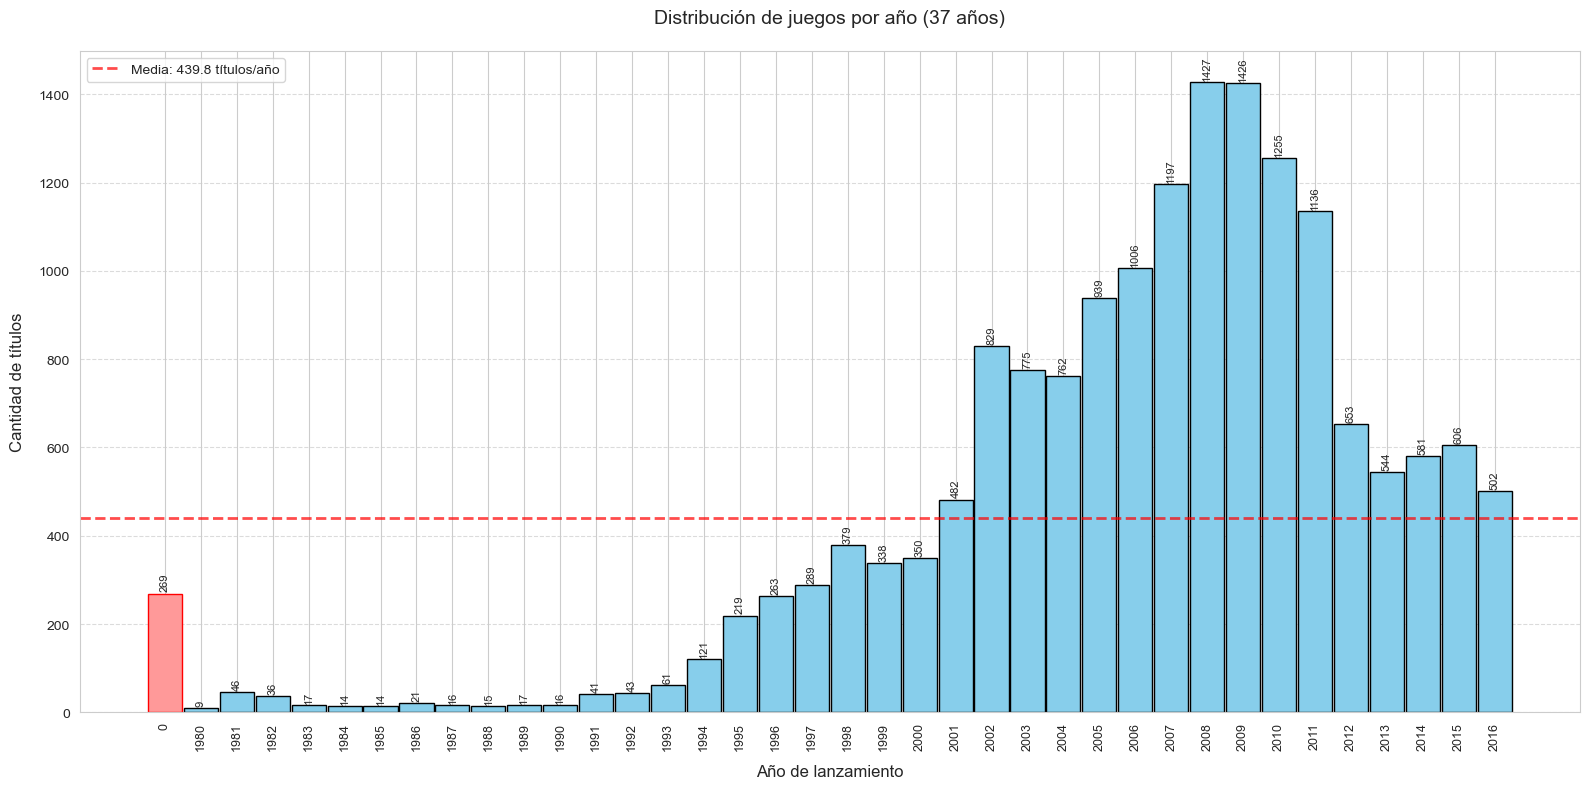

0    -170.842105
1    -430.842105
2    -393.842105
3    -403.842105
4    -422.842105
5    -425.842105
6    -425.842105
7    -418.842105
8    -423.842105
9    -424.842105
10   -422.842105
11   -423.842105
12   -398.842105
13   -396.842105
14   -378.842105
15   -318.842105
16   -220.842105
17   -176.842105
18   -150.842105
19    -60.842105
20   -101.842105
21    -89.842105
22     42.157895
23    389.157895
24    335.157895
25    322.157895
26    499.157895
27    566.157895
28    757.157895
29    987.157895
30    986.157895
31    815.157895
32    696.157895
33    213.157895
34    104.157895
35    141.157895
36    166.157895
37     62.157895
Name: name, dtype: float64
El promedio de títulos lanzados por año es: 439.8


In [78]:
# Crear histograma de cantidad de juegos por año


all_years = [0] + list(range(1980, 2017))

# Create a new DataFrame
df_full = pd.DataFrame({'year_of_release': all_years})
df_full = df_full.merge(df_games_by_years, on='year_of_release', how='left').fillna(0)

# Calculate mean of titles released across all years
mean_value = df_full['name'].mean()

# Convert year to string to treat as categorical
df_full['year_str'] = df_full['year_of_release'].astype(str)

# Create the plot
plt.figure(figsize=(16, 8))
bars = plt.bar(
    df_full['year_str'], 
    df_full['name'],
    width=0.95,
    edgecolor='black',
    color='skyblue'
)

# Add horizontal line for mean value
plt.axhline(
    y=mean_value, 
    color='red', 
    linestyle='--', 
    linewidth=2,
    alpha=0.7,
    label=f'Media: {mean_value:.1f} títulos/año'
)

# Customize x-axis labels
plt.xticks(rotation=90, fontsize=9)

# Special styling for year 0
bars[0].set_color('#ff9999')
bars[0].set_edgecolor('red')

# Add labels and title
plt.title('Distribución de juegos por año (37 años)', fontsize=14, pad=20)
plt.xlabel('Año de lanzamiento', fontsize=12, labelpad=10)
plt.ylabel('Cantidad de títulos', fontsize=12, labelpad=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width()/2, 
            height + 5, 
            f'{int(height)}', 
            ha='center', 
            va='bottom', 
            fontsize=8, 
            rotation=90
        )



# Add legend for the mean line
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
# Calculate deviations per year
desviaciones = df_full['name'] - mean_value
print(desviaciones)

print(f"El promedio de títulos lanzados por año es: {mean_value:.1f}")

#### Notas
*¿Son significativos los datos de cada período?*

1. Los valores con desviaciones positivas (es decir con valores mayores al promedio), comienzan en el año **2001** y no bajan del promedio a partir de ese año. Podrían usarse datos de 2001 en adelante. 


### **b.** Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 

C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\673748581.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_sales = df_games.groupby('platform')['global_sales'].sum()
C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\673748581.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_sales = top_data.groupby(['year_of_release', 'platform'])['global_sales'].sum().reset_index()


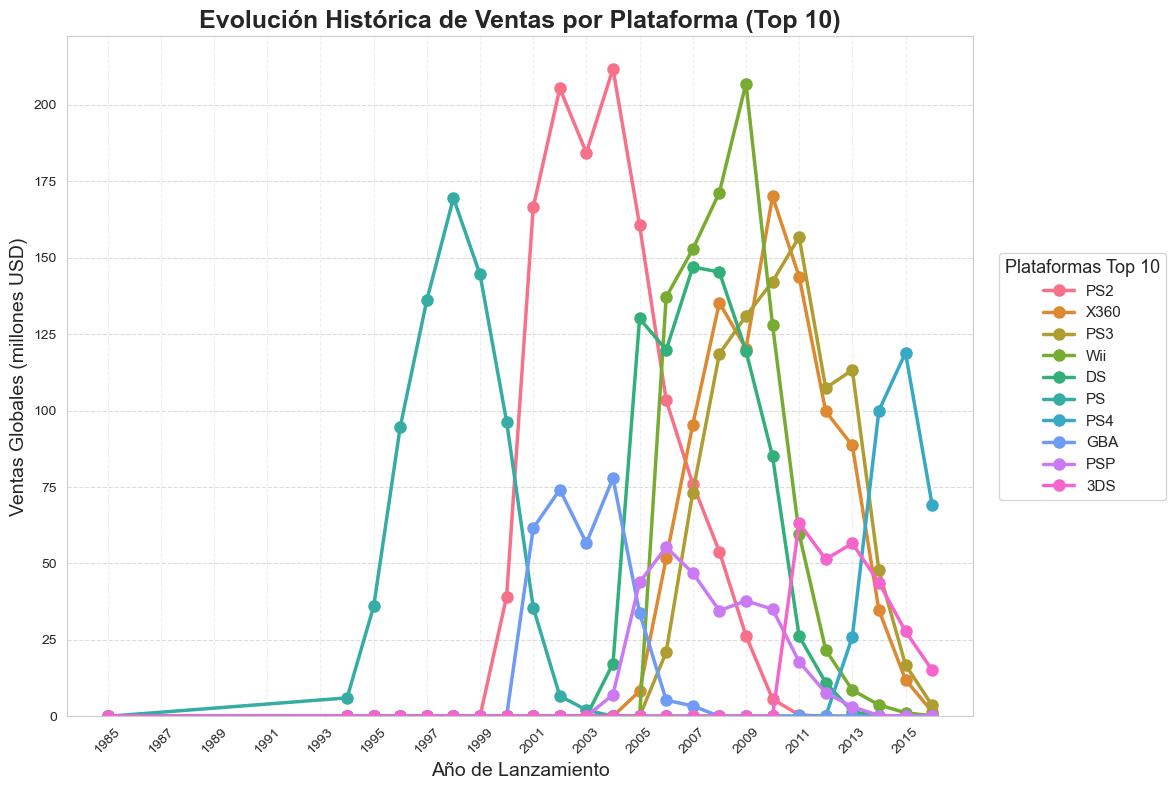


Ventas totales por plataforma:
1. PS2: $1233.56 millones
2. X360: $961.24 millones
3. PS3: $931.34 millones
4. Wii: $891.18 millones
5. DS: $802.78 millones
6. PS: $727.58 millones
7. PS4: $314.14 millones
8. GBA: $312.88 millones
9. PSP: $289.53 millones
10. 3DS: $257.81 millones


C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\673748581.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  last_active = df_games.groupby('platform')['year_of_release'].max()
C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\673748581.py:91: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_life = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])


In [79]:
# Filtrar registros con año de lanzamiento válido (mayor a 0)
df_games = df_games[df_games['year_of_release'] > 0]

# Calcular ventas globales como suma de todas las regiones
df_games['global_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

# Calcular ventas totales por plataforma
platform_sales = df_games.groupby('platform')['global_sales'].sum()

top_platforms = platform_sales.sort_values(ascending=False).head(10).index.tolist() # Seleccionar las 10 plataformas con mayores ventas

# Preparar datos para visualización

# Filtrar solo datos de las plataformas principales
top_data = df_games[df_games['platform'].isin(top_platforms)]

# Agrupar ventas anuales por plataforma
yearly_sales = top_data.groupby(['year_of_release', 'platform'])['global_sales'].sum().reset_index()

######################################## Visualizar tendencias anuales

# Crear figura con tamaño ajustado
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Crear paleta de colores distinta para cada plataforma
palette = sns.color_palette("husl", n_colors=len(top_platforms))

# Graficar cada plataforma individualmente para mayor control
for i, platform in enumerate(top_platforms):
    
    platform_data = yearly_sales[yearly_sales['platform'] == platform] # Filtrar datos para esta plataforma
    
    # Graficar la línea con marcadores
    plt.plot(platform_data['year_of_release'], 
             platform_data['global_sales'], 
             marker='o', 
             linewidth=2.5,
             markersize=8,
             color=palette[i],
             label=platform)

# Personalizar el gráfico
plt.title('Evolución Histórica de Ventas por Plataforma (Top 10)', fontsize=18, fontweight='bold')
plt.xlabel('Año de Lanzamiento', fontsize=14)
plt.ylabel('Ventas Globales (millones USD)', fontsize=14)
plt.yscale('linear') 
plt.grid(True, which='major', linestyle='--', linewidth=0.8, alpha=0.7)
# Configurar leyenda 
plt.legend(
    title='Plataformas Top 10',
    title_fontsize='13',
    fontsize='11',
    loc='center left',  
    bbox_to_anchor=(1.02, 0.5)  # Mover leyenda fuera del gráfico
)

# Ajustar límites y marcas del eje X
min_year = yearly_sales['year_of_release'].min()
max_year = yearly_sales['year_of_release'].max()
plt.xticks(range(int(min_year), int(max_year) + 1, 2), rotation=45)  # Marcas cada 2 años

plt.tight_layout(rect=[0, 0, 0.85, 1])

# Añadir cuadrícula vertical para mejor referencia
plt.grid(axis='x', alpha=0.3)

# Asegurar que no haya valores negativos en el eje Y
plt.ylim(bottom=0)

# Show
plt.show()
##############################################
# Identificar plataformas descontinuadas

# Calcular año máximo en el dataset
max_year = df_games['year_of_release'].max()

# Encontrar último año de actividad por plataforma
last_active = df_games.groupby('platform')['year_of_release'].max()

# Identificar plataformas del top 10 sin ventas recientes
discontinued = [
    p for p in top_platforms 
    if last_active[p] < max_year - 2  # Sin ventas en los últimos 3 años
]

# Analizar ciclo de vida

# Calcular primer y último año de actividad
platform_life = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_life['lifespan'] = platform_life['max'] - platform_life['min'] + 1

# Calcular frecuencia de nuevos lanzamientos
launch_years = platform_life['min'].sort_values() # Obtener años de lanzamiento (el primer año de cada plataforma)
#print(launch_years)
launch_gaps = launch_years.diff().mean() # Calcular diferencia promedio entre lanzamientos

# Calcular vida promedio de plataformas discontinuadas
discontinued_lifespan = platform_life[platform_life['max'] < max_year - 2]['lifespan'].mean()

# Print resultados

print("\nVentas totales por plataforma:")
print("=" * 50)
for i, platform in enumerate(top_platforms, 1):
    print(f"{i}. {platform}: ${platform_sales[platform]:.2f} millones")


### **b.** *Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?*

In [80]:
print("\nPlataformas Descontinuadas del Top 10 (Sin lanzamientos en los utlimos 3 años):")
print("=" * 50)
for platform in discontinued:
    last_year = last_active[platform]
    print(f"- {platform} (último año activo: {last_year})")


print("\nAnálisis de Ciclo de Vida:")
print(f"- Nuevas plataformas aparecen cada {launch_gaps:.1f} años en promedio")
print(f"- Plataformas descontinuadas duran {discontinued_lifespan:.1f} años en promedio")



Plataformas Descontinuadas del Top 10 (Sin lanzamientos en los utlimos 3 años):
- PS2 (último año activo: 2011)
- DS (último año activo: 2013)
- PS (último año activo: 2003)
- GBA (último año activo: 2007)

Análisis de Ciclo de Vida:
- Nuevas plataformas aparecen cada 1.1 años en promedio
- Plataformas descontinuadas duran 7.8 años en promedio


#### Notas

1. En la gráfica de ventas (**b.**) podemos ver como el "inicio" de cada plataforma se acelera despues de *1999* con la salida de la plataforma **PS2**. Significando que a partir de ese año la aparición de nuevas plataformas se acelera.
2. Como vemos en el punto **a.** el promedio de lanzamiento de nuevos titulos supera la media despues del año **2001**. 


### **c.** Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

#### Conclusiones

*Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.*
-   Debido a la aceleracion en lanzamiento de titulos, y la aparición de plataformas. Se tomarán en cuenta valores a partir del año **2000** para poder hace un modelo *relevante* para el año **2017**.

*¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.*
-   El top de venta plataformas nos indica que debemos hacer tres grupos.
    1. **Sony** con 5 plataformas en top 10.
    2. **Nintendo** con 4 plataformas en top 10.
    3. **Microsoft** con 1 plataforma en top 10 (Se agregarán *X360* y *XOne* pues son plataformas de los ultimos años del set)
    4. **PC** Aunque no está en el top, se agregará como plataforma de legado.

### **d.** Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.


In [81]:
#print(df_games.info()) 

In [82]:
#print(df_games['platform'].value_counts()) # Revisar plataformas

C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\2525007815.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = ax.boxplot(
C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\2525007815.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = ax.boxplot(
C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\2525007815.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = ax.boxplot(
C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\2525007815.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will 

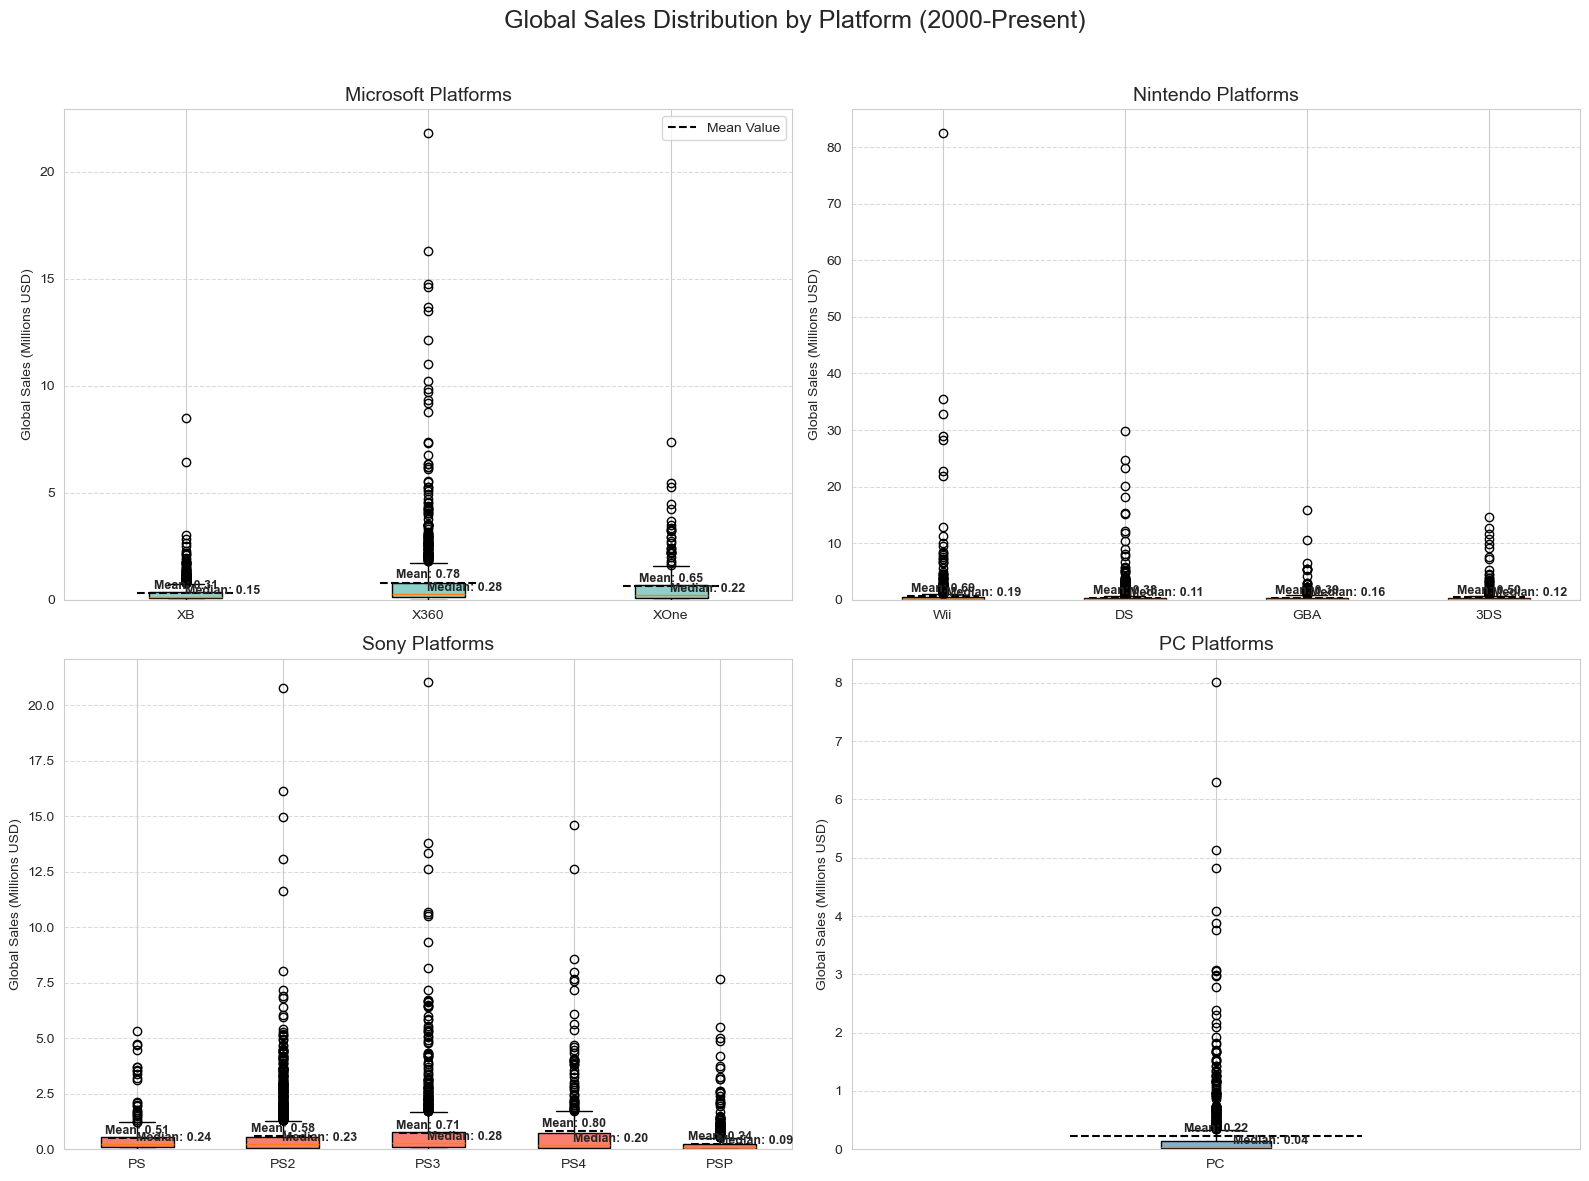

In [83]:

# Define platform-to-company mapping
company_mapping = {
    'Microsoft': ['XB', 'X360', 'XOne'],
    'Nintendo': ['Wii', 'DS', 'GBA', '3DS'],
    'Sony': ['PS','PS2', 'PS3', 'PS4', 'PSP'],
    'PC': ['PC']
}

# Add company column
df_games['company'] = df_games['platform'].apply(
    lambda x: next((comp for comp, plats in company_mapping.items() if x in plats), None)
)

# Filter data (year >= 2000 and valid companies)
df_filtered = df_games[
    (df_games['year_of_release'] >= 2000) & 
    (df_games['company'].notnull())
]

# Create figure with 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Global Sales Distribution by Platform (2000-Present)', fontsize=18)

# Colors for each company
company_colors = {
    'Microsoft': '#8ECFC9',
    'Nintendo': '#FFBE7A',
    'Sony': '#FA7F6F',
    'PC': '#82B0D2'
}

# Process each company
for i, (company, platforms) in enumerate(company_mapping.items()):
    ax = axes[i//2, i%2]  # Determine subplot position
    
    # Filter data for current company
    company_data = df_filtered[df_filtered['company'] == company]
    
    # Prepare platform data - only include platforms with data
    platform_data = []
    valid_platforms = []
    for platform in platforms:
        platform_sales = company_data[company_data['platform'] == platform]['global_sales']
        if len(platform_sales) > 0:  # Only include platforms with data
            platform_data.append(platform_sales)
            valid_platforms.append(platform)
    
    # Skip if no valid platforms
    if len(platform_data) == 0:
        continue
    
    # Create box plot
    boxplot = ax.boxplot(
        platform_data, 
        labels=valid_platforms,
        patch_artist=True,
        showfliers=True  # Show outliers
    )
    
    # Color boxes
    for patch in boxplot['boxes']:
        patch.set_facecolor(company_colors[company])
    
    # Add median annotations
    medians = [np.median(d) for d in platform_data]
    for j, line in enumerate(boxplot['medians']):
        x, y = line.get_xydata()[1]  # Top point of median line
        ax.text(x, y, f'Median: {medians[j]:.2f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Add mean lines and annotations
    means = [np.mean(d) for d in platform_data]
    for j, mean in enumerate(means):
        ax.hlines(
            mean, 
            xmin=j + 0.8, 
            xmax=j + 1.2, 
            colors='black', 
            linestyles='dashed',
            linewidth=1.5
        )
        ax.text(j + 1.0, mean * 1.1, f'Mean: {mean:.2f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Set subplot title and labels
    ax.set_title(f'{company} Platforms', fontsize=14)
    ax.set_ylabel('Global Sales (Millions USD)', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(bottom=0)  # Start y-axis at 0
    
    # Add mean legend only once
    if i == 0:
        ax.legend(
            [plt.Line2D([0], [0], color='black', lw=1.5, linestyle='--')],
            ['Mean Value'],
            loc='upper right'
        )

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate suptitle
plt.show()

C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\1480319252.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(


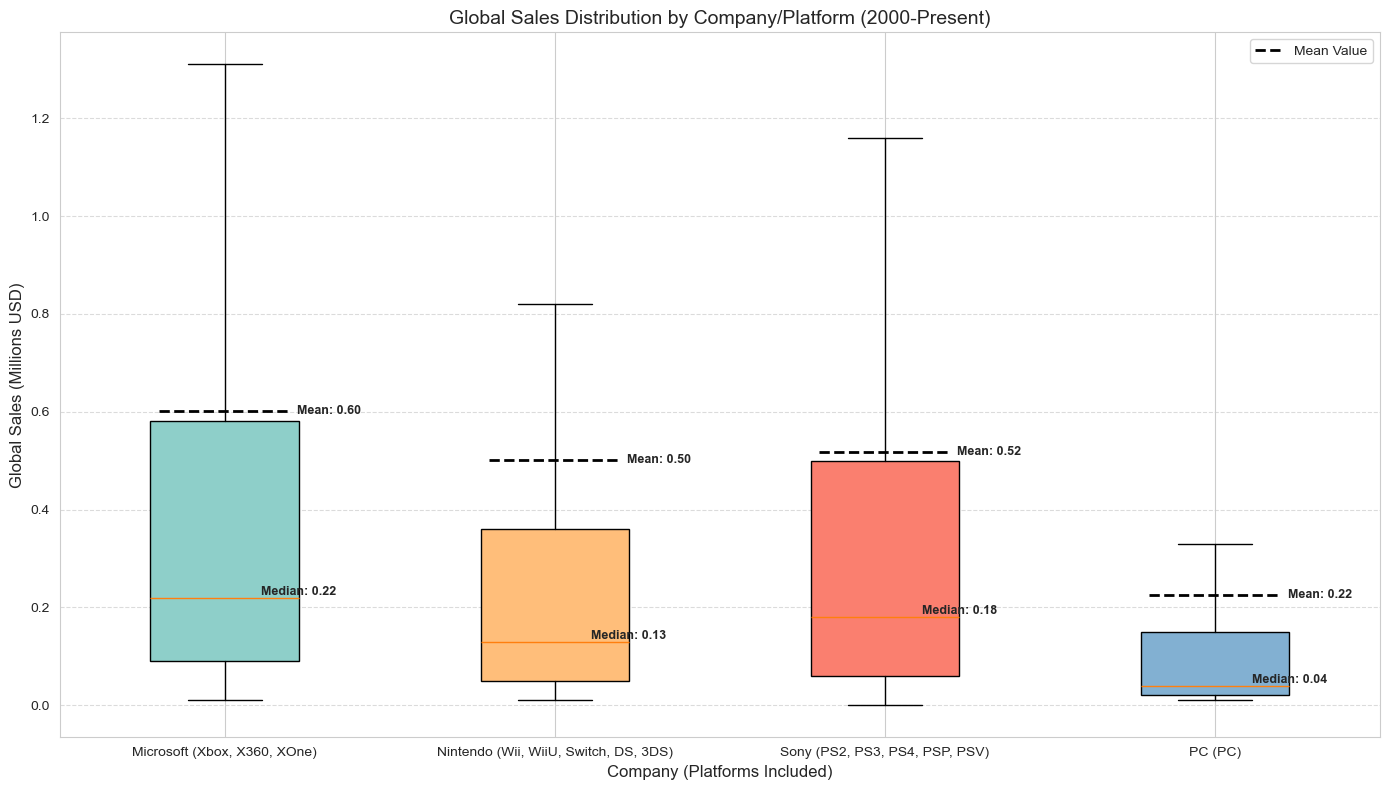

In [ ]:
# Define platform-to-company mapping with platforms listed
company_mapping = {
    'Microsoft (Xbox, X360, XOne)': ['XB', 'X360', 'XOne'],
    'Nintendo (Wii, WiiU, Switch, DS, 3DS)': ['Wii', 'WiiU', 'Switch', 'DS', '3DS'],
    'Sony (PS2, PS3, PS4, PSP, PSV)': ['PS2', 'PS3', 'PS4', 'PSP', 'PSV'],
    'PC (PC)': ['PC']
}


platform_to_company = {}
for company_label, platforms in company_mapping.items():
    for platform in platforms:
        platform_to_company[platform] = company_label

# Add company column
df_games['company'] = df_games['platform'].map(platform_to_company)
#print(df_games.info())  # 
# Filter data (year >= 2000 and valid companies)
df_filtered = df_games[
    (df_games['year_of_release'] >= 2000) & 
    (df_games['company'].notnull())
]

# Prepare plot
plt.figure(figsize=(14, 8))
companies = list(company_mapping.keys())  # Get company labels with platforms
data = [df_filtered[df_filtered['company'] == c]['global_sales'] for c in companies]

# Create boxplot
boxplot = plt.boxplot(
    data, 
    labels=companies,
    patch_artist=True,
    showfliers=False,  # Hide outliers
)

# Customize box colors
colors = ['#8ECFC9', '#FFBE7A', '#FA7F6F', '#82B0D2']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Add median annotations
medians = [np.median(dataset) for dataset in data]
for i, line in enumerate(boxplot['medians']):
    x, y = line.get_xydata()[1]  # Top point of median line
    plt.text(x, y, f'Median: {medians[i]:.2f}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add mean lines
means = [np.mean(dataset) for dataset in data]
for i, (company, mean) in enumerate(zip(companies, means)):
    plt.hlines(
        mean, 
        xmin=i + 0.8, 
        xmax=i + 1.2, 
        colors='black', 
        linestyles='dashed',
        linewidth=2
    )
    # Add mean value text annotation
    plt.text(i + 1.22, mean, f'Mean: {mean:.2f}', 
             ha='left', va='center', fontsize=9, fontweight='bold')

# Finalize plot
plt.title('Global Sales Distribution by Company/Platform (2000-Present)', fontsize=14)
plt.ylabel('Global Sales (Millions USD)', fontsize=12)
plt.xlabel('Company (Platforms Included)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Add legend
plt.legend(
    [plt.Line2D([0], [0], color='black', lw=2, linestyle='--')],
    ['Mean Value'],
    loc='upper right'
)

plt.show()

### **d.** *¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.*

In [85]:
# Filter data (year >= 2000 and specified companies)
df_filtered = df_games[
    (df_games['year_of_release'] >= 2000) & 
    (df_games['company'].notnull())
]

# Print hypotheses
print("Hypothesis Testing for Global Sales Differences:")
print("H₀ (Null Hypothesis): There is no significant difference in mean global sales between groups")
print("H₁ (Alternative Hypothesis): There is a significant difference in mean global sales between groups")
print("Significance level: α = 0.05")

# Prepare results table
results = []
companies = list(company_mapping.keys())

# Manually create all pairwise combinations
pairs = [
    (companies[0], companies[1]),  # Microsoft vs Nintendo
    (companies[0], companies[2]),  # Microsoft vs Sony
    (companies[0], companies[3]),  # Microsoft vs PC
    (companies[1], companies[2]),  # Nintendo vs Sony
    (companies[1], companies[3]),  # Nintendo vs PC
    (companies[2], companies[3])   # Sony vs PC
]

# Perform pairwise t-tests for each combination
for comp1, comp2 in pairs:
    # Get sales data for both companies
    sales1 = df_filtered[df_filtered['company'] == comp1]['global_sales']
    sales2 = df_filtered[df_filtered['company'] == comp2]['global_sales']
    
    # Perform independent t-test (Welch's t-test - unequal variances)
    t_stat, p_value = st.ttest_ind(sales1, sales2, equal_var=False, nan_policy='omit')
    
    # Calculate mean sales and sample sizes
    mean1 = sales1.mean()
    mean2 = sales2.mean()
    n1 = len(sales1.dropna())
    n2 = len(sales2.dropna())
    
    # Determine significance
    alpha = 0.05
    significant = "Reject H0" if p_value < alpha else "Fail to reject H0"
    conclusion = "Significant difference" if p_value < alpha else "No significant difference"
    
    # Store results
    results.append({
        'Group 1': comp1,
        'Group 2': comp2,
        'n1': n1,
        'n2': n2,
        'Mean 1': f"{mean1:.4f}M",
        'Mean 2': f"{mean2:.4f}M",
        'T-statistic': round(t_stat, 4),
        'P-value': f"{p_value:.6f}",
        'Significance (α=0.05)': significant,
        'Conclusion': conclusion
    })

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df[[
    'Group 1', 'Group 2', 'n1', 'n2', 'Mean 1', 'Mean 2', 
    'T-statistic', 'P-value', 'Significance (α=0.05)', 'Conclusion'
]]

print(results_df)
print( '/' * 50)
# Significant pairs summary
significant_df = results_df[results_df['Significance (α=0.05)'] == 'Reject H0']
if not significant_df.empty:
    print("\nSignificant Differences Found:")
    print(significant_df[['Group 1', 'Group 2', 'P-value', 'Conclusion']])
else:
    print("\nNo significant differences found at α=0.05 level")

Hypothesis Testing for Global Sales Differences:
H₀ (Null Hypothesis): There is no significant difference in mean global sales between groups
H₁ (Alternative Hypothesis): There is a significant difference in mean global sales between groups
Significance level: α = 0.05
                                 Group 1  \
0           Microsoft (Xbox, X360, XOne)   
1           Microsoft (Xbox, X360, XOne)   
2           Microsoft (Xbox, X360, XOne)   
3  Nintendo (Wii, WiiU, Switch, DS, 3DS)   
4  Nintendo (Wii, WiiU, Switch, DS, 3DS)   
5         Sony (PS2, PS3, PS4, PSP, PSV)   

                                 Group 2    n1    n2   Mean 1   Mean 2  \
0  Nintendo (Wii, WiiU, Switch, DS, 3DS)  2282  4065  0.6013M  0.5004M   
1         Sony (PS2, PS3, PS4, PSP, PSV)  2282  5447  0.6013M  0.5182M   
2                                PC (PC)  2282   917  0.6013M  0.2243M   
3         Sony (PS2, PS3, PS4, PSP, PSV)  4065  5447  0.5004M  0.5182M   
4                                PC (PC)  4065   91

#### Conclusiones

1. Viendo el diagrama de caja agrupado por compañia podemos observar que el conjunto de *Microsoft*  que tiene un promedio y mediana sobre los de los otros conjuntos. (Se eliminaron los valores outliers para poder visualizar correctamente)
2. Se hace un t_test para poder verificar la diferencia significativa entre los conjuntos. 
    - Se verifica la diferenia significativa entre *Microsoft* con *Nintendo*, *Sony* y *PC*
    - Y la de *Nintendo* y *Sony* sobre *PC*
    - Entre *Nintendo* y *Sony* se ha fallado en refutar la hipostesis nula.

### **f.** Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

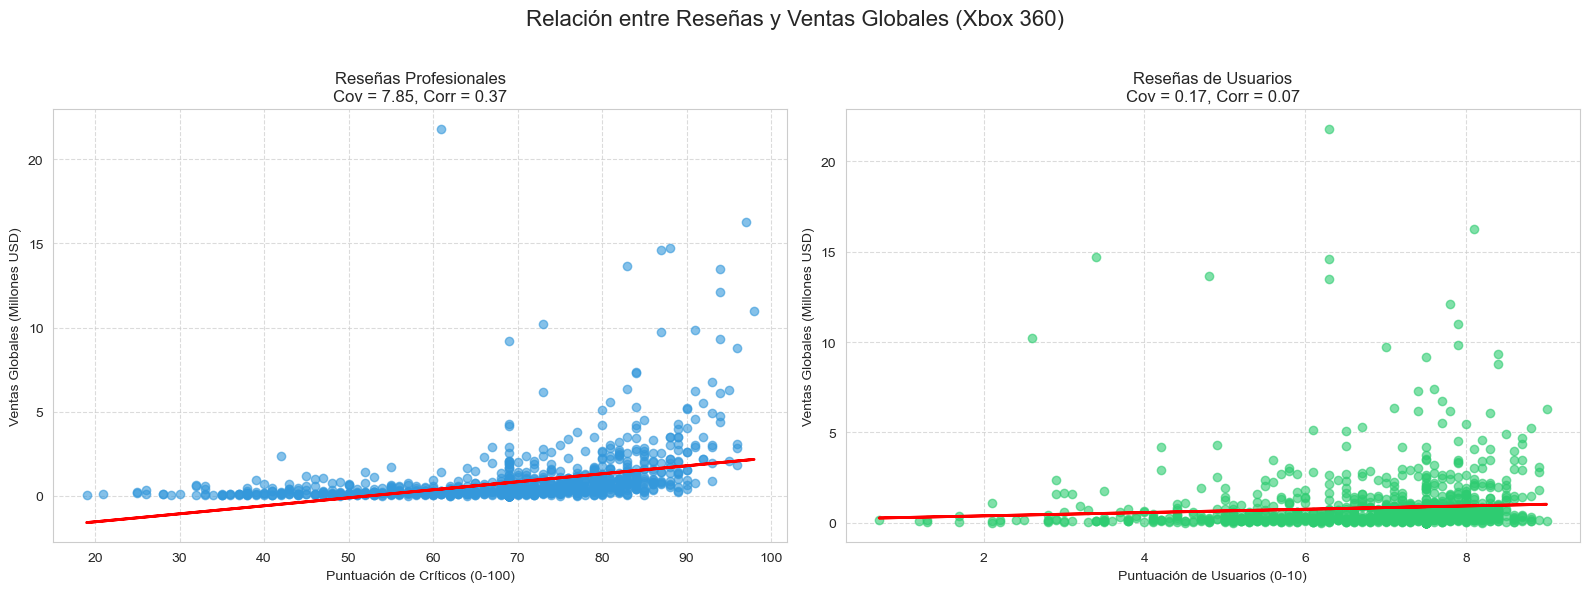

In [86]:
# Filtrar datos para Xbox 360
df_x360 = df_games[df_games['platform'] == 'X360'].copy()

# Convertir user_score_filled a numérico
df_x360['user_score_numeric'] = pd.to_numeric(df_x360['user_score_filled'], errors='coerce')

# Crear figura con subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Relación entre Reseñas y Ventas Globales (Xbox 360)', fontsize=16)

# 1. Reseñas profesionales vs Ventas
# Filtrar NaN para este par de variables
prof_data = df_x360[['critic_score_filled', 'global_sales']].dropna()
x_prof = prof_data['critic_score_filled']
y_prof = prof_data['global_sales']

# Calcular covarianza y correlación
cov_prof = np.cov(x_prof, y_prof)[0, 1]
corr_prof = np.corrcoef(x_prof, y_prof)[0, 1]

# Gráfico de dispersión
ax[0].scatter(x_prof, y_prof, alpha=0.6, color='#3498db')
ax[0].set_title(f'Reseñas Profesionales\nCov = {cov_prof:.2f}, Corr = {corr_prof:.2f}')
ax[0].set_xlabel('Puntuación de Críticos (0-100)')
ax[0].set_ylabel('Ventas Globales (Millones USD)')
ax[0].grid(True, linestyle='--', alpha=0.7)

# Añadir línea de regresión
m, b = np.polyfit(x_prof, y_prof, 1)
ax[0].plot(x_prof, m*x_prof + b, color='red', linewidth=2)

# 2. Reseñas de usuarios vs Ventas
# Filtrar NaN para este par de variables
user_data = df_x360[['user_score_numeric', 'global_sales']].dropna()
x_user = user_data['user_score_numeric']
y_user = user_data['global_sales']

# Calcular covarianza y correlación
cov_user = np.cov(x_user, y_user)[0, 1]
corr_user = np.corrcoef(x_user, y_user)[0, 1]

# Gráfico de dispersión
ax[1].scatter(x_user, y_user, alpha=0.6, color='#2ecc71')
ax[1].set_title(f'Reseñas de Usuarios\nCov = {cov_user:.2f}, Corr = {corr_user:.2f}')
ax[1].set_xlabel('Puntuación de Usuarios (0-10)')
ax[1].set_ylabel('Ventas Globales (Millones USD)')
ax[1].grid(True, linestyle='--', alpha=0.7)

# Añadir línea de regresión
m, b = np.polyfit(x_user, y_user, 1)
ax[1].plot(x_user, m*x_user + b, color='red', linewidth=2)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



#### Conclusiones

Reseñas profesionales (`critic_score`)
- **Covarianza**: 10.88
    - Hay una relación positiva moderada
- **Correlacion**: 0.39
    - 0.39 indica una correlación positiva moderada (rango medio entre 0.3 y 0.7)
- Se puede asumir que:
    - Juegos con mejores críticas profesionales tienden a vender más

////////////////////////////////////////////////

Reseñas usuarios (`user_score`)
- **Covarianza**: 0.17
    - Hay una relación positiva minima (no impacta tanto en el ejemplo que se trabajó)
- **Correlacion**: 0.07
    - 0.07 indica una minima correlacion que podria ser impulsada por otros factores
- Se puede asumir que:
    - La relación entre estas variables no son independientes, un cambio afecta al otro, sin embargo hay otros factores que afectan mas.

Las reseñas profesionales son un predictor moderadamente confiable de ventas, pero el éxito comercial depende de múltiples factores adicionales.


### **g.** Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Como se evaluó la varianza y la covarianza por grupos de compañias, me gustaría evaluar las ventas de un mismo juego en diferentes plataformas con un analisis de la varianza y covarianza.
</div>

In [87]:
# Obtener juegos que se encuentren en las 4 compañías principales

#print(df_games.info()) # Revisar dataframeans

df_game_sales = (
    df_games.groupby('name', as_index=False)
    .agg(
        global_sales=('global_sales', 'sum'),
        genre=('genre', 'first'),
        year_of_release=('year_of_release', 'min')  # Usar min/max si hay múltiples
    )
    .query('year_of_release >= 2000')  # Filtro post-agregación
    .sort_values('global_sales', ascending=False)
    .reset_index(drop=True)
)
#print(df_game_sales.head(20)) # Mostrar top 

In [88]:
ms_platforms = company_mapping['Microsoft (Xbox, X360, XOne)']
sony_platforms = company_mapping['Sony (PS2, PS3, PS4, PSP, PSV)']
pc_platforms = company_mapping['PC (PC)']

# Obtener sets de juegos por compañía
ms_games = set(df_games[df_games['platform'].isin(ms_platforms)]['name'])
sony_games = set(df_games[df_games['platform'].isin(sony_platforms)]['name'])
pc_games = set(df_games[df_games['platform'].isin(pc_platforms)]['name'])

# Encontrar interseccion de games (SONY, MICROSOFT and PC)
triple_platform_games = ms_games & sony_games & pc_games
#print(triple_platform_games)
#top_triple_game = ( # Sorted by global_sales descending
#    df_game_sales[df_game_sales['name'].isin(triple_platform_games)]
#    .head(1)  # Select top game
#)

# ENcontrar interseccion de games (SONY, MICROSOFT, PC and NINTENDO)
nintendo_platforms = company_mapping['Nintendo (Wii, WiiU, Switch, DS, 3DS)']
nintendo_games = set(df_games[df_games['platform'].isin(nintendo_platforms)]['name'])
quad_platform_games = triple_platform_games & nintendo_games
#print(quad_platform_games)
top_quad_game = (
    df_game_sales[df_game_sales['name'].isin(quad_platform_games)] # Filter games in all four platforms
    .head(3)  # Select top 5 games
)

# Print
# Primer verificacion si no se encontraba alguna plataforma de nintendo compatible
#print("\nJuego top ventas en Microsoft, PC, and Sony:")
#print(top_triple_game[['name', 'global_sales']])

print("\nJuego top 3 ventas en Microsoft, PC, Sony, y Nintendo:")
print(top_quad_game[['name', 'global_sales']])


Juego top 3 ventas en Microsoft, PC, Sony, y Nintendo:
                              name  global_sales
4   Call of Duty: Modern Warfare 3         30.60
6       Call of Duty: Black Ops II         29.40
10            Call of Duty: Ghosts         27.39


#### Notes
-   Como  **Call of Duty: Modern Warfare 3** es un juego en las 4 compañias, se usará como ejemplo para revisar varianza y covarianza. 

#### Call of Duty: Modern Warfare 3

In [89]:
# Filter for the specific game
cod_df = df_games[df_games['name'] == "Call of Duty: Modern Warfare 3"].copy()

# Convert scores to numeric
cod_df['user_score_filled'] = pd.to_numeric(cod_df['user_score_filled'], errors='coerce')
cod_df['critic_score_filled'] = pd.to_numeric(cod_df['critic_score_filled'], errors='coerce')

# Extract relevant columns
platform_data = cod_df[['platform', 'user_score_filled', 'critic_score_filled', 'global_sales']]
print(platform_data)


     platform  user_score_filled  critic_score_filled  global_sales
29       X360                3.4                 88.0         14.73
37        PS3                3.2                 88.0         13.33
1040       PC                2.5                 78.0          1.71
2500      Wii                1.8                 70.0          0.83


In [90]:
# Calculate variances
user_var = platform_data['user_score_filled'].var()
critic_var = platform_data['critic_score_filled'].var()
sales_var = platform_data['global_sales'].var()

# Calculate covariances
cov_user_sales = platform_data['user_score_filled'].cov(platform_data['global_sales'])
cov_critic_sales = platform_data['critic_score_filled'].cov(platform_data['global_sales'])

# Calculate covariance coefficient
corr_user_sales = platform_data['user_score_filled'].corr(platform_data['global_sales'])
corr_critic_sales = platform_data['critic_score_filled'].corr(platform_data['global_sales'])

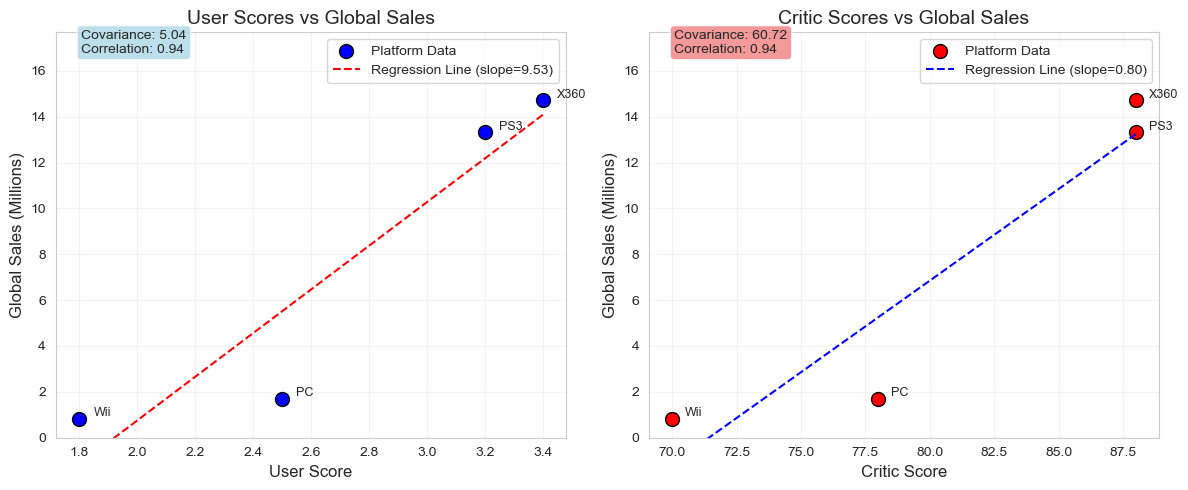

In [91]:
plt.figure(figsize=(12, 5))

# Plot 1: User Scores vs Global Sales with Regression Line
plt.subplot(1, 2, 1)
x_user = platform_data['user_score_filled']
y_sales = platform_data['global_sales']

# Scatter plot
plt.scatter(
    x_user, 
    y_sales, 
    s=100,
    c='blue',
    edgecolor='black',
    label='Platform Data'
)

# Add regression line
slope_user, intercept_user = np.polyfit(x_user, y_sales, 1)
reg_line_user = slope_user * x_user + intercept_user
plt.plot(
    x_user, 
    reg_line_user, 
    'r--', 
    label=f'Regression Line (slope={slope_user:.2f})'
)

# Add platform labels
for i, row in platform_data.iterrows():
    plt.text(
        row['user_score_filled'] + 0.05, 
        row['global_sales'] + 0.1,
        row['platform'],
        fontsize=9
    )

plt.title('User Scores vs Global Sales', fontsize=14)
plt.xlabel('User Score', fontsize=12)
plt.ylabel('Global Sales (Millions)', fontsize=12)
plt.grid(alpha=0.2)
plt.ylim(0, y_sales.max() * 1.2)
plt.legend()

# Add covariance information
plt.annotate(f"Covariance: {cov_user_sales:.2f}\nCorrelation: {corr_user_sales:.2f}", 
             xy=(0.05, 0.95), 
             xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", alpha=0.8))

# Plot 2: Critic Scores vs Global Sales with Regression Line
plt.subplot(1, 2, 2)
x_critic = platform_data['critic_score_filled']

# Scatter plot
plt.scatter(
    x_critic, 
    y_sales, 
    s=100,
    c='red',
    edgecolor='black',
    label='Platform Data'
)

# Add regression line
slope_critic, intercept_critic = np.polyfit(x_critic, y_sales, 1)
reg_line_critic = slope_critic * x_critic + intercept_critic
plt.plot(
    x_critic, 
    reg_line_critic, 
    'b--', 
    label=f'Regression Line (slope={slope_critic:.2f})'
)

# Add platform labels
for i, row in platform_data.iterrows():
    plt.text(
        row['critic_score_filled'] + 0.5, 
        row['global_sales'] + 0.1,
        row['platform'],
        fontsize=9
    )

plt.title('Critic Scores vs Global Sales', fontsize=14)
plt.xlabel('Critic Score', fontsize=12)
plt.ylabel('Global Sales (Millions)', fontsize=12)
plt.grid(alpha=0.2)
plt.ylim(0, y_sales.max() * 1.2)
plt.legend()

# Add covariance information
plt.annotate(f"Covariance: {cov_critic_sales:.2f}\nCorrelation: {corr_critic_sales:.2f}", 
             xy=(0.05, 0.95), 
             xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="lightcoral", alpha=0.8))

plt.tight_layout()
plt.show()

In [92]:
# Print platform-specific metrics

print("USER SCORE VS GLOBAL SALES BY PLATFORM")

for platform in ['X360', 'PS3', 'PC', 'Wii']:
    platform_df = platform_data[platform_data['platform'] == platform]
    if not platform_df.empty:
        row = platform_df.iloc[0]
        print(f"{platform}")
        print(f"{'User Score:':<25} {row['user_score_filled']:.1f}")
        print(f"{'Global Sales:':<25} {row['global_sales']:.1f}M")
        print("-"*40)


print("CRITIC SCORE VS GLOBAL SALES BY PLATFORM")

for platform in ['X360', 'PS3', 'PC', 'Wii']:
    platform_df = platform_data[platform_data['platform'] == platform]
    if not platform_df.empty:
        row = platform_df.iloc[0]
        print(f"{platform}")
        print(f"{'Critic Score:':<25} {row['critic_score_filled']:.1f}")
        print(f"{'Global Sales:':<25} {row['global_sales']:.1f}M")
        print("-"*40)



USER SCORE VS GLOBAL SALES BY PLATFORM
X360
User Score:               3.4
Global Sales:             14.7M
----------------------------------------
PS3
User Score:               3.2
Global Sales:             13.3M
----------------------------------------
PC
User Score:               2.5
Global Sales:             1.7M
----------------------------------------
Wii
User Score:               1.8
Global Sales:             0.8M
----------------------------------------
CRITIC SCORE VS GLOBAL SALES BY PLATFORM
X360
Critic Score:             88.0
Global Sales:             14.7M
----------------------------------------
PS3
Critic Score:             88.0
Global Sales:             13.3M
----------------------------------------
PC
Critic Score:             78.0
Global Sales:             1.7M
----------------------------------------
Wii
Critic Score:             70.0
Global Sales:             0.8M
----------------------------------------


#### Conclusiones
Reseñas usuarios (`user_score`) vs Global Sales (Escala de 0-10)
- **Covarianza**: 5.04
    - Hay una relación positiva 
- **Correlacion**: 0.94
    - Indica una correlación alta positiva 
- Se puede asumir que:
    - Juegos con mejores críticas profesionales tienden a vender más

Reseñas profesionales (`critic_score`) vs Global Sales (Escala de 0-100)
- **Covarianza**: 60.72
    - Hay una relación positiva 
- **Correlacion**: 0.94
    - Indica una correlación alta positiva 
- Se puede asumir que:
    - Juegos con mejores críticas profesionales tienden a vender más

### **h.** Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

           genre  global_sales
0         Action       1510.86
10        Sports       1124.72
8        Shooter        904.43
7   Role-Playing        721.44
3           Misc        709.72
6         Racing        557.19
4       Platform        463.62
9     Simulation        332.91
2       Fighting        305.86
1      Adventure        183.56


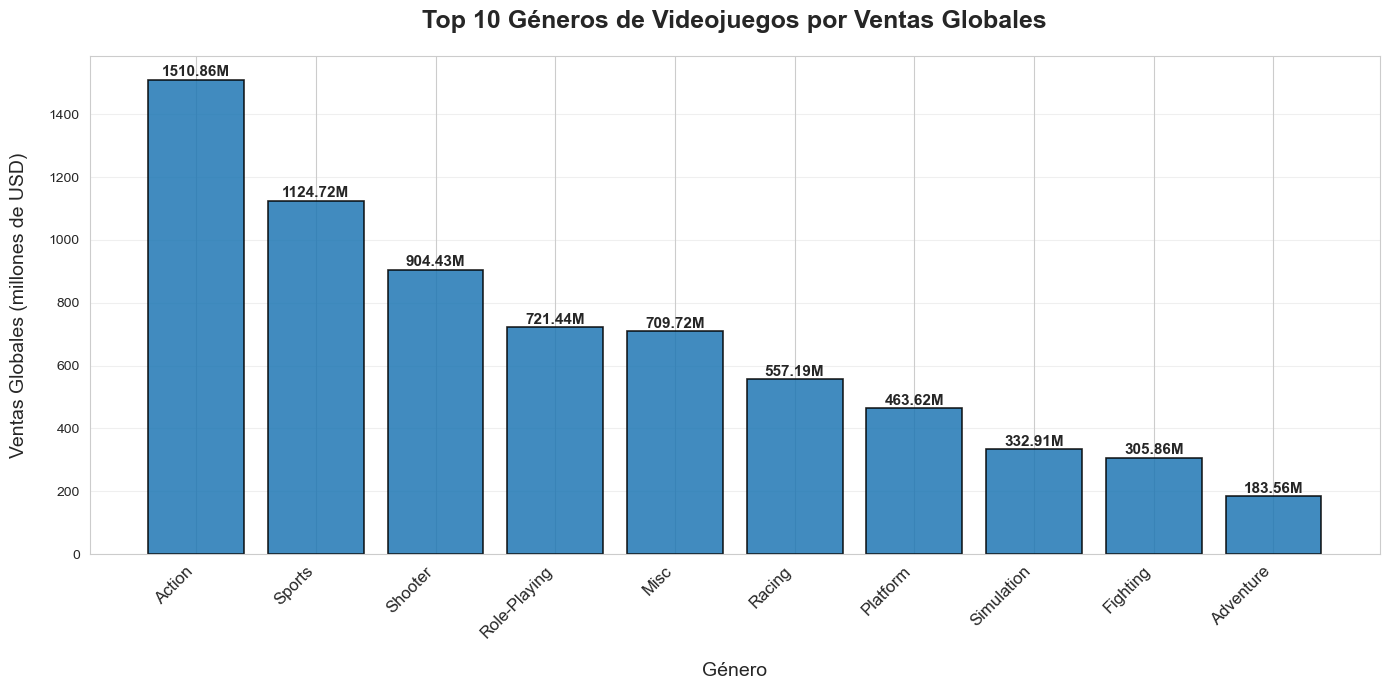

        genre  global_sales
9  Simulation        332.91
2    Fighting        305.86
1   Adventure        183.56


In [93]:
#print(df_game_sales.head(20)) # Mostrar top 20 juegos por ventas globales
# Mostrar todos los generos
#print(df_game_sales['genre'].unique()) 


# Agrupar por género y sumar ventas 
ventas_por_genero = (
    df_game_sales.groupby('genre', as_index=False)['global_sales']
    .sum()  # Sumar ventas para cada género
    .sort_values('global_sales', ascending=False)  # Ordenar de mayor a menor
    .head(10)  # Tomar los 10 géneros principales
)
print(ventas_por_genero)  # Mostrar ventas por género
plt.figure(figsize=(14, 7))

# Crear gráfico de barras verticales
barras = plt.bar(
    ventas_por_genero['genre'],  # Géneros en eje X
    ventas_por_genero['global_sales'],  # Ventas en eje Y
    color='#1f77b4',  
    edgecolor='black', 
    linewidth=1.2,  
    alpha=0.85  
)

# Personalizar el gráfico
plt.title('Top 10 Géneros de Videojuegos por Ventas Globales', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Género', fontsize=14, labelpad=15)
plt.ylabel('Ventas Globales (millones de USD)', fontsize=14, labelpad=15)
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.grid(axis='y', alpha=0.3)

# Añadir etiquetas de valor en cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2, 
        altura + 1.5, 
        f'{altura:.2f}M',  
        ha='center',  
        va='bottom',  
        fontsize=11,
        fontweight='bold'
    )

# Ajustar márgenes y mostrar
plt.tight_layout()
plt.show()
print(ventas_por_genero.tail(3))  # Mostrar los 10 géneros con menos ventas


#### Revisar top selling game de cada genero

In [94]:
# Obtener el top venta de cada genero 
top_ventas_genero = (
    df_game_sales.loc[df_game_sales.groupby('genre')['global_sales'].idxmax()]
    .sort_values('global_sales', ascending=False)
)
print(top_ventas_genero[['genre', 'name', 'global_sales']])  # Mostrar top ventas por género


            genre                                         name  global_sales
0          Sports                                   Wii Sports         82.54
1          Action                           Grand Theft Auto V         56.58
2          Racing                               Mario Kart Wii         35.52
4         Shooter               Call of Duty: Modern Warfare 3         30.60
5        Platform                        New Super Mario Bros.         29.80
8            Misc                                     Wii Play         28.91
13     Simulation                                   Nintendogs         24.67
22   Role-Playing                  The Elder Scrolls V: Skyrim         21.14
35         Puzzle  Brain Age 2: More Training in Minutes a Day         15.28
48       Fighting                      Super Smash Bros. Brawl         12.84
65      Adventure                             Assassin's Creed         11.28
275      Strategy               StarCraft II: Wings of Liberty          4.83

#### Evaluar la cantidad de juegos de cada genero con `global_sales`

           genre  titles_count  global_sales     ratio
8        Shooter           658        904.43  1.374514
4       Platform           434        463.62  1.068249
10        Sports          1064       1124.72  1.057068
6         Racing           579        557.19  0.962332
0         Action          1719       1510.86  0.878918
2       Fighting           440        305.86  0.695136
7   Role-Playing          1041        721.44  0.693026
3           Misc          1202        709.72  0.590449
9     Simulation           634        332.91  0.525095
1      Adventure           960        183.56  0.191208


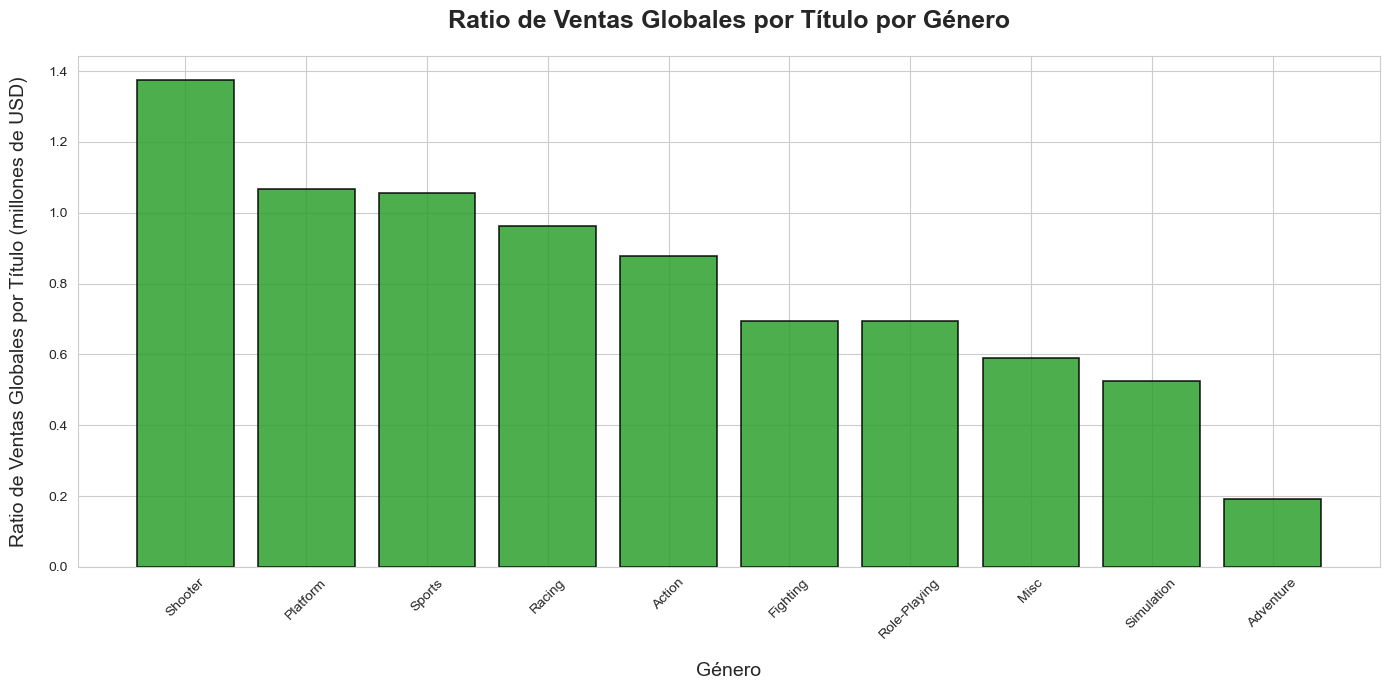

In [95]:
titles_by_genre = df_game_sales['genre'].value_counts() 
#print(titles_by_genre)  # Mostrar cantidad de títulos por género
#print(ventas_por_genero)

# Calcular ratio de ventas globales contra cantidad de títulos por género 
ventas_por_genero['titles_count'] = titles_by_genre.reindex(ventas_por_genero['genre']).values
ventas_por_genero['ratio'] = ventas_por_genero['global_sales'] / ventas_por_genero['titles_count']
ventas_por_genero = ventas_por_genero.sort_values('ratio', ascending=False) # Ordenar por ratio
print(ventas_por_genero[['genre', 'titles_count', 'global_sales', 'ratio']])  # Mostrar 

# Crear gráfico de barras del ratio
plt.figure(figsize=(14, 7))
plt.bar(
    ventas_por_genero['genre'], 
    ventas_por_genero['ratio'], 
    color='#2ca02c', 
    edgecolor='black', 
    linewidth=1.2, 
    alpha=0.85
)
# Personalizar el gráfico
plt.title('Ratio de Ventas Globales por Título por Género', fontsize=18, pad=20, fontweight='bold') 
plt.xlabel('Género', fontsize=14, labelpad=15)
plt.ylabel('Ratio de Ventas Globales por Título (millones de USD)', fontsize=14, labelpad=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Notas

*¿Qué se puede decir de los géneros más rentables?*

- Los géneros mas vendidos son **Action**, **Sports** y **Shooter**. 
- Al comparar las ventas globales con la cantidad de titulos lanzados, **Shooter**, **Platform** y **Sports** estan en los primeros lugares, desplazando a **Action** hasta el quinto lugar. 
- Se puede decir que en realidad **Shooter**, **Platform** y **Sports** son mas exitosos, pues siendo los generos que mas ventas generan en relacion a cuantos titulos son lanzados, lo que nos indica que se genera mas dinero con menos titulos. 

*¿Puedes generalizar acerca de los géneros con ventas altas y bajas?*

- Se puede generalizar los generos con mas ventas tienden a ser exitosos (en cuanto a ventas), sin embargo hay que visualizar siempre el factor de cantidad de titulos. En nuestro analisis descubrimos que aunque **Action** genera muchas ganancias, lo hace por la cantidad enorme de titulos que se lanzan del género (**1719**).
- Sobre los generos menos vendidos tambien podemos generalizar que son los que menor radio tienen, sin embargo, es notable ver una menor diferencia entre valores que si solo se evalua ventas globales.
- Asi mismo al obtener el radio de los generos menos vendidos, encontramos que por ejemplo el genero **Simulation** (el mas bajo) representa el **22%** de las ventas globales de **Action** (el mas alto). 
Pero al comparar los radios de **Simulation** (penultimo radio mas bajo) con **Shooter** (el radio mas alto) representa el **37.9%** lo cual cierra la distancia mas amplia cuando solo se evaluan ventas: y si lo comparamos con **Action** es del **59%**. 

# Paso 4. Crea un perfil de usuario para cada región

## Para cada región (NA, UE, JP) determina:
- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### **a.** Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.


Top 5 Plataformas: PS2, X360, PS3, Wii, DS
Total Global Sales (Top 5 Plataformas): $4820.10 millones
NA: 50.33%
EU: 28.52%
JP: 9.80%
Other: 11.34%


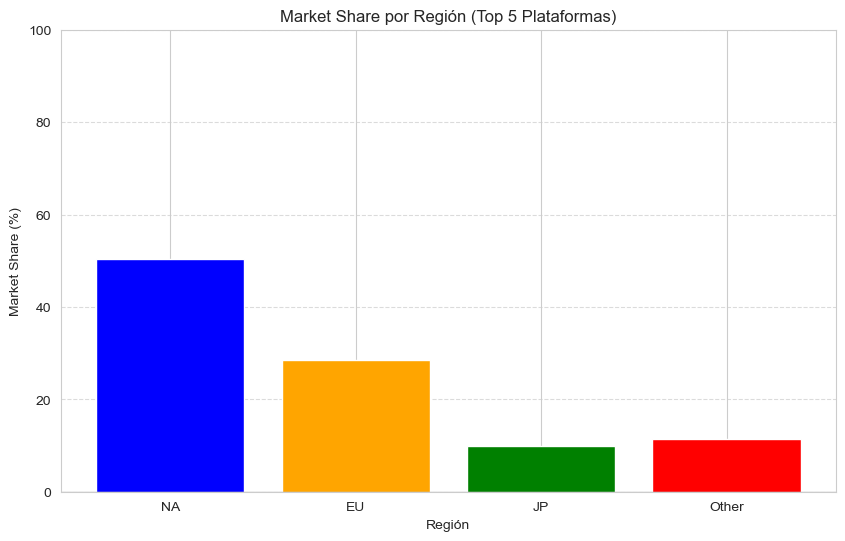

In [96]:
top_5__platforms = top_platforms[:5]  # Top 5 plataformas 
print(f"\nTop 5 Plataformas: {', '.join(top_5__platforms)}")

# Filtrar datos para las 5 plataformas principales
df_top_platforms = df_games[df_games['platform'].isin(top_5__platforms)]

# Calcular global sale de las 5 plataformas
total_global_sales_top_5 = df_top_platforms['global_sales'].sum()
print(f"Total Global Sales (Top 5 Plataformas): ${total_global_sales_top_5:.2f} millones")

# Calcular market share por región para las 5 plataformas principales
market_share_top_5 = {
    'NA': df_top_platforms['na_sales'].sum() / total_global_sales_top_5 * 100, # Comparacion con el total de ventas globales (TOP 5)
    'EU': df_top_platforms['eu_sales'].sum() / total_global_sales_top_5 * 100,
    'JP': df_top_platforms['jp_sales'].sum() / total_global_sales_top_5 * 100,
    'Other': df_top_platforms['other_sales'].sum() / total_global_sales_top_5 * 100
}

for region, share in market_share_top_5.items():
    print(f"{region}: {share:.2f}%")
######################################## Visualizar market share por región
# Show market share in a bar graph
plt.figure(figsize=(10, 6))
plt.bar(market_share_top_5.keys(), market_share_top_5.values(), color=['blue', 'orange', 'green', 'red'])
plt.title("Market Share por Región (Top 5 Plataformas)")
plt.xlabel("Región")
plt.ylabel("Market Share (%)")
plt.ylim(0, 100)
plt.axhline(y=0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Notas

- `NA` obtiene ligeramente mas del **50%** del mercado en las 5 principales plataformas (*PS2, X360, PS3, Wii y DS*)
- `JP` obtiene el ultimo lugar con solo **9.80%**. 

### **b.** Los cinco géneros principales. Explica la diferencia.

In [97]:
#print(ventas_por_genero)
ventas_por_genero = ventas_por_genero.reset_index(drop=True)  # Reset index and drop extra column
ventas_por_genero = ventas_por_genero.drop(columns=['index'], errors='ignore')  # Eliminar columna extra
print(ventas_por_genero)  # Mostrar el DataFrame final
#print(df_games.info())  # Revisar información del DataFrame final

          genre  global_sales  titles_count     ratio
0       Shooter        904.43           658  1.374514
1      Platform        463.62           434  1.068249
2        Sports       1124.72          1064  1.057068
3        Racing        557.19           579  0.962332
4        Action       1510.86          1719  0.878918
5      Fighting        305.86           440  0.695136
6  Role-Playing        721.44          1041  0.693026
7          Misc        709.72          1202  0.590449
8    Simulation        332.91           634  0.525095
9     Adventure        183.56           960  0.191208


In [98]:
# Group by NA region and sum global sales by genre
na_sales_by_genre = (
    df_games[df_games['year_of_release'] >= 2000]  # Filter rows where year >= 2000
    .groupby('genre', as_index=False)['na_sales']
    .sum()
    .sort_values('na_sales', ascending=False)
    .reset_index(drop=True))

na_sales_by_genre = na_sales_by_genre.reset_index(drop=True)  # Reset index and drop extra column
na_sales_by_genre = na_sales_by_genre.drop(columns=['index'], errors='ignore')  # Eliminar columna extra
#print(na_sales_by_genre.head())
# Calcular market share de la region por género en NA
na_sales_by_genre['market_share_region_top'] = na_sales_by_genre['na_sales'] / na_sales_by_genre['na_sales'].sum()
print(na_sales_by_genre.head(5))  # Mostrar ventas por género en NA
print('Market share del top 5 géneros en NA vs total de la región:', na_sales_by_genre['market_share_region_top'].head(5).round(3).sum() * 100, '%') # Show market share of top 5 genres in NA
print('Promedio market share de NA(total):', na_sales_by_genre['market_share_region_top'].mean().round(3))  # Calcular el market share promedio de la región NA
print("#" * 30)
#########################################################
eu_sales_by_genre = (
    df_games[df_games['year_of_release'] >= 2000] # Filter rows where year >= 2000
    .groupby('genre', as_index=False)['eu_sales']
    .sum()
    .sort_values('eu_sales', ascending=False)
    .reset_index(drop=True))

eu_sales_by_genre = eu_sales_by_genre.reset_index(drop=True)  # Reset index and drop extra column
eu_sales_by_genre = eu_sales_by_genre.drop(columns=['index'], errors='ignore')  # Eliminar columna extra
eu_sales_by_genre['market_share_region_top'] = eu_sales_by_genre['eu_sales'] / eu_sales_by_genre['eu_sales'].sum()
print("Top géneros por ventas en EU:")
print(eu_sales_by_genre.head(5))
print('Market share del top 5 géneros en EU:', eu_sales_by_genre['market_share_region_top'].head(5).round(3).sum() * 100, '%')
print("#" * 30)
#########################################################
jp_sales_by_genre = (
    df_games[df_games['year_of_release'] >= 2000]  # Filter rows where year >= 2000
    .groupby('genre', as_index=False)['jp_sales']
    .sum()
    .sort_values('jp_sales', ascending=False)
    .reset_index(drop=True))

jp_sales_by_genre = jp_sales_by_genre.reset_index(drop=True)  # Reset index and drop extra column
jp_sales_by_genre = jp_sales_by_genre.drop(columns=['index'], errors='ignore')  # Eliminar columna extra
jp_sales_by_genre['market_share_region_top'] = jp_sales_by_genre['jp_sales'] / jp_sales_by_genre['jp_sales'].sum()
print("Top géneros por ventas en JP:")
print(jp_sales_by_genre.head(5))
print('Market share del top 5 géneros en JP:', jp_sales_by_genre['market_share_region_top'].head(5).round(3).sum() * 100, '%')
print("#" * 30)
#########################################################
other_sales_by_genre = (
    df_games[df_games['year_of_release'] >= 2000]  # Filter rows where year >= 2000
    .groupby('genre', as_index=False)['other_sales']
    .sum()
    .sort_values('other_sales', ascending=False)
    .reset_index(drop=True))

other_sales_by_genre = other_sales_by_genre.reset_index(drop=True)  # Reset index and drop extra column
other_sales_by_genre = other_sales_by_genre.drop(columns=['index'], errors='ignore')  # Eliminar columna extra
other_sales_by_genre['market_share_region_top'] = other_sales_by_genre['other_sales'] / other_sales_by_genre['other_sales'].sum()
print("Top géneros por ventas en Other:")
print(other_sales_by_genre.head(5))
print('Market share del top 5 géneros en Other:', other_sales_by_genre['market_share_region_top'].head(5).round(3).sum() * 100, '%')
print("#" * 30)

          genre  na_sales  market_share_region_top
0        Action    752.27                 0.213131
1        Sports    589.39                 0.166984
2       Shooter    495.23                 0.140307
3          Misc    365.27                 0.103487
4  Role-Playing    282.30                 0.079981
Market share del top 5 géneros en NA vs total de la región: 70.3 %
Promedio market share de NA(total): 0.083
##############################
Top géneros por ventas en EU:
     genre  eu_sales  market_share_region_top
0   Action    466.58                 0.223714
1   Sports    339.58                 0.162820
2  Shooter    294.02                 0.140976
3     Misc    196.71                 0.094318
4   Racing    192.02                 0.092069
Market share del top 5 géneros en EU: 71.39999999999999 %
##############################
Top géneros por ventas en JP:
          genre  jp_sales  market_share_region_top
0  Role-Playing    241.71                 0.296279
1        Action    132.23  

#### **NA** Análisis

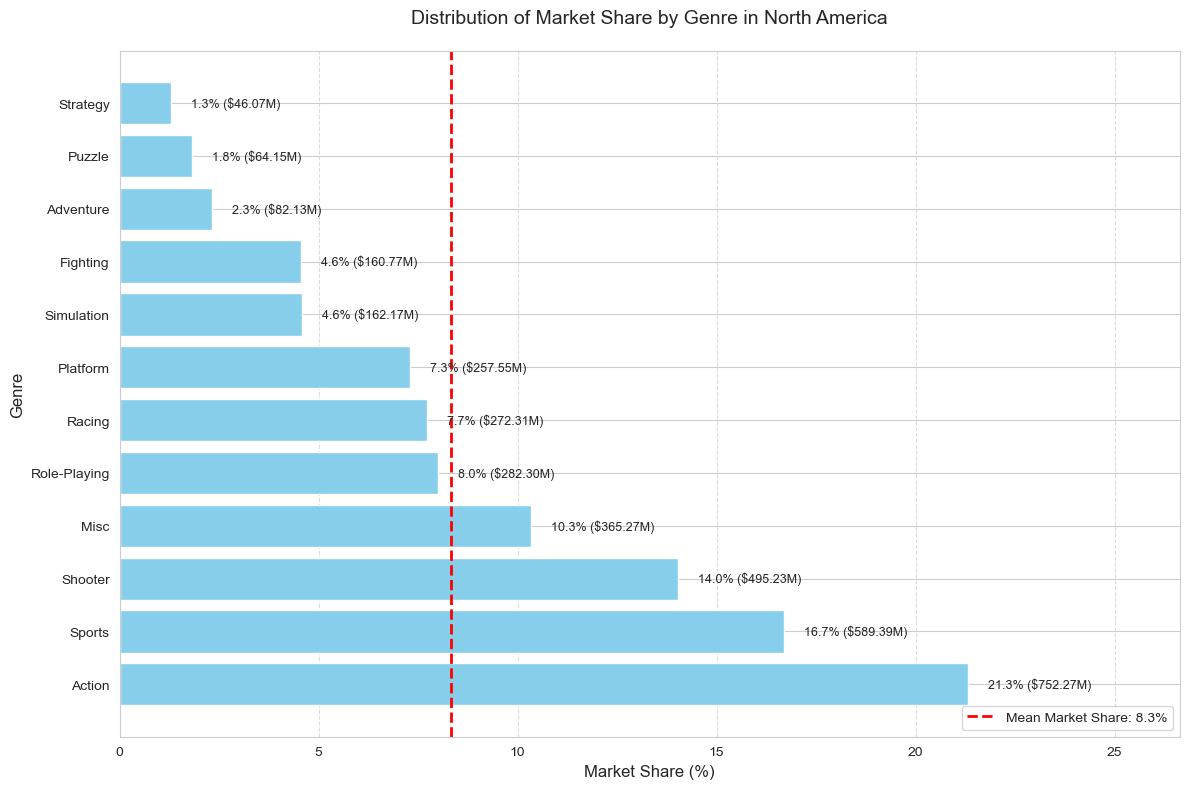

In [99]:

# Calculate mean market share
mean_share = na_sales_by_genre['market_share_region_top'].mean() * 100

# Create the figure
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
bars = plt.barh(na_sales_by_genre['genre'],
                na_sales_by_genre['market_share_region_top'] * 100,  # Convert to percentage
                color='skyblue')

# Add mean line
plt.axvline(mean_share, color='red', linestyle='--', linewidth=2, 
            label=f'Mean Market Share: {mean_share:.1f}%')

# Add market share percentages AND sales values at end of bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    sales_value = na_sales_by_genre.iloc[i]['na_sales']
    
    # Create dual label (market share % and sales value)
    label_text = f'{width:.1f}% (${sales_value:.2f}M)'
    
    plt.text(width + 0.5,  # x-position (offset)
             bar.get_y() + bar.get_height()/2,  # y-position (center)
             label_text, 
             va='center',
             fontsize=9)

# Add labels and title
plt.xlabel('Market Share (%)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Distribution of Market Share by Genre in North America', fontsize=14, pad=20)
plt.legend(loc='lower right')  # Show mean line legend

# Improve layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, na_sales_by_genre['market_share_region_top'].max() * 100 * 1.25)  # Add headroom
plt.tight_layout()

plt.show()

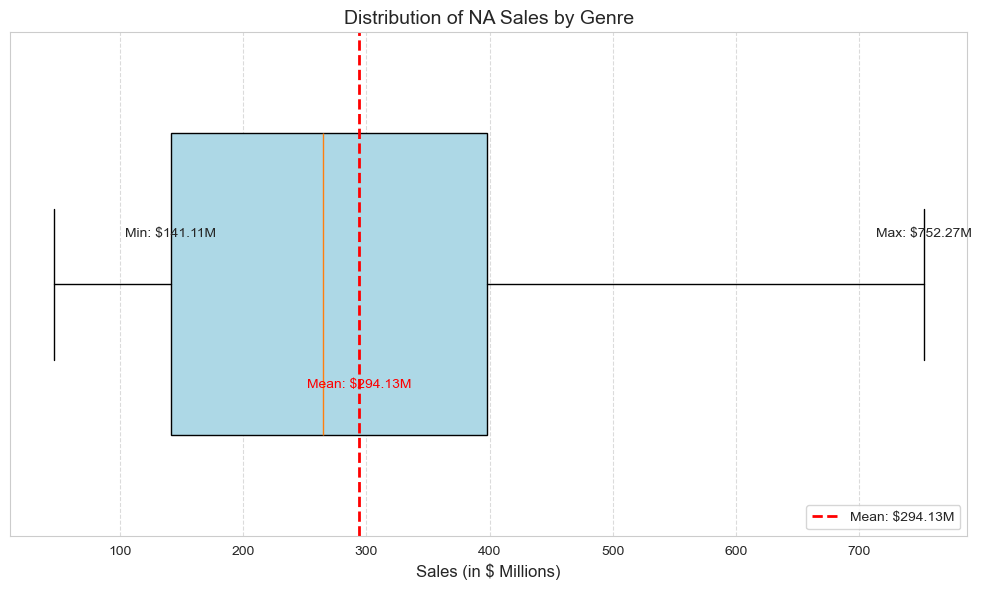

In [100]:
plt.figure(figsize=(10, 6))

# Create box plot
box = plt.boxplot(na_sales_by_genre['na_sales'], 
                  vert=False,  # Horizontal orientation
                  patch_artist=True,
                  widths=0.6)

# Customize box colors
colors = ['lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Calculate and add mean line
mean_value = np.mean(na_sales_by_genre['na_sales'])
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${mean_value:.2f}M')

# Add labels and title
plt.title('Distribution of NA Sales by Genre', fontsize=14)
plt.xlabel('Sales (in $ Millions)', fontsize=12)
plt.yticks([])  # Hide y-axis as it's a single distribution

# Add value labels for important points
plt.text(box['whiskers'][0].get_xdata()[0], 1.1, 
         f"Min: ${box['whiskers'][0].get_xdata()[0]:.2f}M", 
         ha='center', va='center')
plt.text(box['whiskers'][1].get_xdata()[1], 1.1, 
         f"Max: ${box['whiskers'][1].get_xdata()[1]:.2f}M", 
         ha='center', va='center')
plt.text(mean_value, 0.8, 
         f"Mean: ${mean_value:.2f}M", 
         ha='center', va='center', color='red')

# Add legend and grid
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [101]:

# Calculate desviacion standard de ventas por género de region NA 
na_sales_by_genre['sales_deviation'] = na_sales_by_genre['na_sales'] - na_sales_by_genre['na_sales'].mean()
# Calculate and show desviacion standard de ventas por género de region NA
na_sales_std = na_sales_by_genre['na_sales'].std()
print(f"Desviación estándar de ventas por género en NA: {na_sales_std:.2f}")
# Z score calculation for NA sales by genre
na_sales_by_genre['z_score'] = (na_sales_by_genre['na_sales'] - na_sales_by_genre['na_sales'].mean()) / na_sales_std
#########################
print("Información de ventas por género en NA:")
print(na_sales_by_genre[['genre', 'na_sales', 'sales_deviation', 'z_score']])  # Mostrar desviación de ventas por género en NA


Desviación estándar de ventas por género en NA: 221.38
Información de ventas por género en NA:
           genre  na_sales  sales_deviation   z_score
0         Action    752.27       458.135833  2.069466
1         Sports    589.39       295.255833  1.333714
2        Shooter    495.23       201.095833  0.908379
3           Misc    365.27        71.135833  0.321331
4   Role-Playing    282.30       -11.834167 -0.053457
5         Racing    272.31       -21.824167 -0.098583
6       Platform    257.55       -36.584167 -0.165256
7     Simulation    162.17      -131.964167 -0.596101
8       Fighting    160.77      -133.364167 -0.602425
9      Adventure     82.13      -212.004167 -0.957654
10        Puzzle     64.15      -229.984167 -1.038872
11      Strategy     46.07      -248.064167 -1.120542


##### **NA** Conclusiones:
Top Géneros: **Action, Sports, Shooter, Platform, Misc**

- Sólo 4 generos del top (**Action, Sports, Shooter, Misc**), tienen una desviación positiva de ventas por género. 
- La distribucion de ventas se encuentra sesgada hacia la derecha, con un promedio de ventas de **294.13 M de USD**.
- Rango de **706.2**.
- El género **Action** destaca por tener un Standard Score (Z score) de **2.069**. Lo cual nos indica la relacion entre la desviacion y la media (para fines prácticos "*a cuantas desviaciones standard se encuentra un valor sobre la media"*). Esto indica los titulos de este genero generan poco mas de **200%** mas ventas que la media. 

**Conteo de Aparaciones en Top 5 por Region**

Top 5 generos por ventas globales:

    - Action: 1
    - Sports: 1
    - Shooter: 1
    - Role-Playing: 0
    - Misc: 1

#### **EU** Análisis


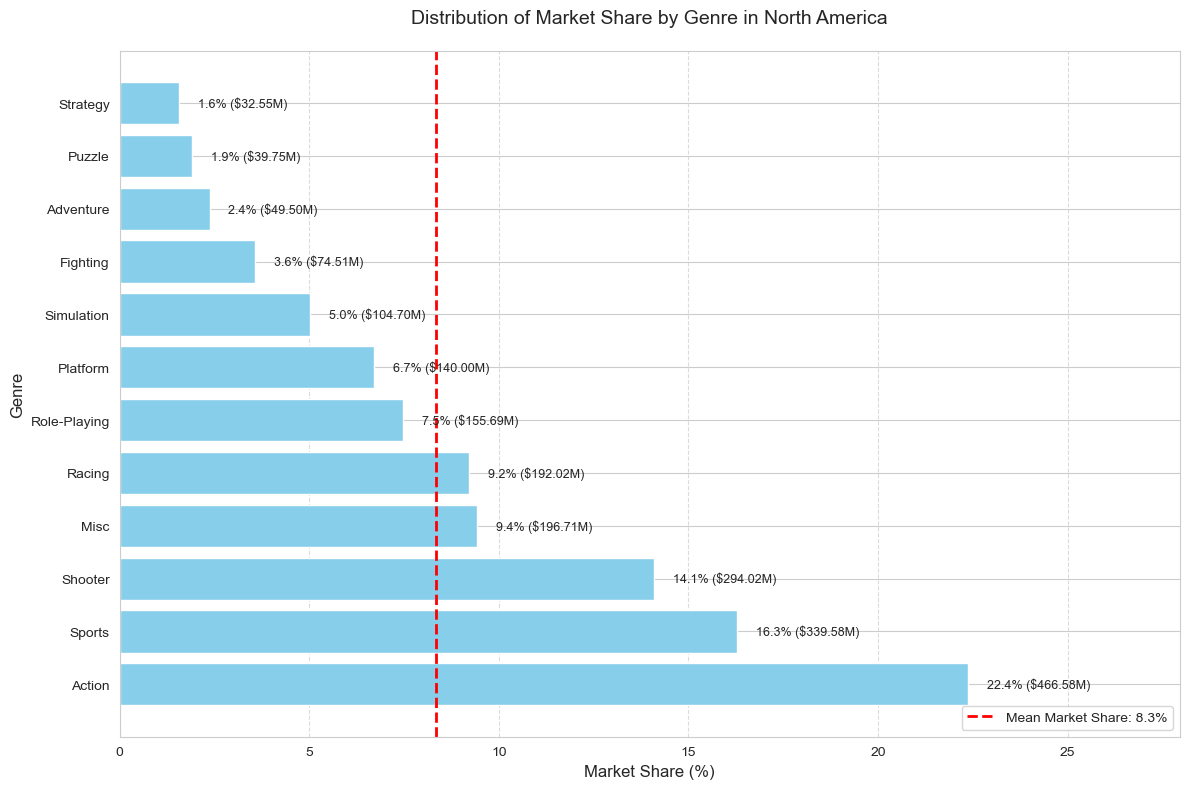

In [102]:
# Calculate mean market share
mean_share = eu_sales_by_genre['market_share_region_top'].mean() * 100

# Create the figure
plt.figure(figsize=(12, 8))

# Create horizontal bar plot
bars = plt.barh(eu_sales_by_genre['genre'],
                eu_sales_by_genre['market_share_region_top'] * 100,  # Convert to percentage
                color='skyblue')

# Add mean line
plt.axvline(mean_share, color='red', linestyle='--', linewidth=2, 
            label=f'Mean Market Share: {mean_share:.1f}%')

# Add market share percentages AND sales values at end of bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    sales_value = eu_sales_by_genre.iloc[i]['eu_sales']
    
    # Create dual label (market share % and sales value)
    label_text = f'{width:.1f}% (${sales_value:.2f}M)'
    
    plt.text(width + 0.5,  # x-position (offset)
             bar.get_y() + bar.get_height()/2,  # y-position (center)
             label_text, 
             va='center',
             fontsize=9)

# Add labels and title
plt.xlabel('Market Share (%)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Distribution of Market Share by Genre in North America', fontsize=14, pad=20)
plt.legend(loc='lower right')  # Show mean line legend

# Improve layout
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, eu_sales_by_genre['market_share_region_top'].max() * 100 * 1.25)  # Add headroom
plt.tight_layout()

plt.show()

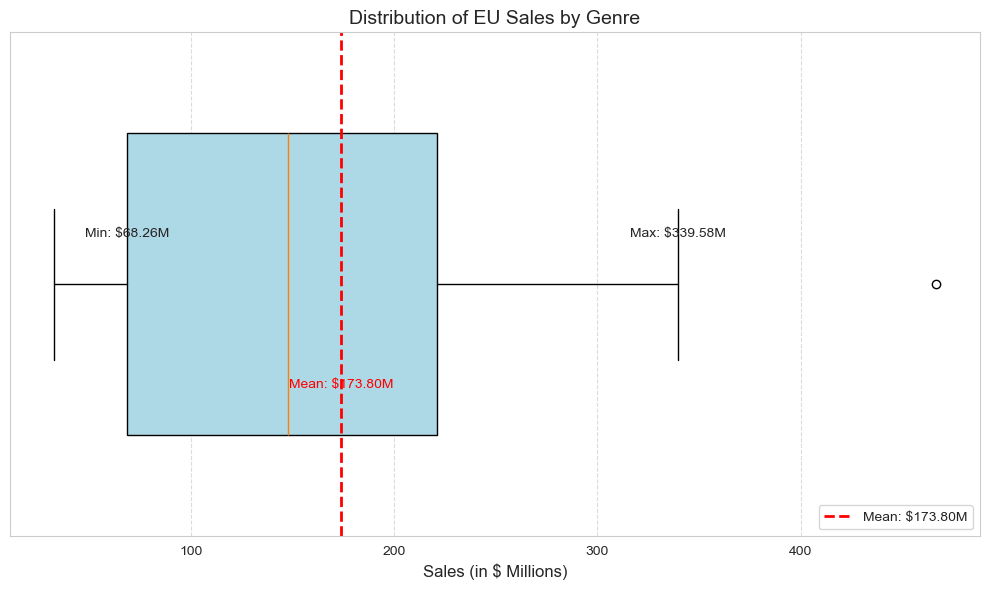

In [103]:
plt.figure(figsize=(10, 6))
box_eu = plt.boxplot(eu_sales_by_genre['eu_sales'], 
                     vert=False,
                     patch_artist=True,
                     widths=0.6)

for patch in box_eu['boxes']:
    patch.set_facecolor('lightblue')

mean_value_eu = np.mean(eu_sales_by_genre['eu_sales'])
plt.axvline(mean_value_eu, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${mean_value_eu:.2f}M')

plt.text(box_eu['whiskers'][0].get_xdata()[0], 1.1, 
         f"Min: ${box_eu['whiskers'][0].get_xdata()[0]:.2f}M", 
         ha='center', va='center')
plt.text(box_eu['whiskers'][1].get_xdata()[1], 1.1, 
         f"Max: ${box_eu['whiskers'][1].get_xdata()[1]:.2f}M", 
         ha='center', va='center')
plt.text(mean_value_eu, 0.8, 
         f"Mean: ${mean_value_eu:.2f}M", 
         ha='center', va='center', color='red')

plt.title('Distribution of EU Sales by Genre', fontsize=14)
plt.xlabel('Sales (in $ Millions)', fontsize=12)
plt.yticks([])
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [104]:
eu_sales_by_genre['sales_deviation'] = eu_sales_by_genre['eu_sales'] - eu_sales_by_genre['eu_sales'].mean()
eu_sales_std = eu_sales_by_genre['eu_sales'].std()
print(f"Desviación estándar de ventas por género en EU: {eu_sales_std:.2f}")
eu_sales_by_genre['z_score'] = (eu_sales_by_genre['eu_sales'] - eu_sales_by_genre['eu_sales'].mean()) / eu_sales_std
print("\nInformación de ventas por género en EU:")
print(eu_sales_by_genre[['genre', 'eu_sales', 'sales_deviation', 'z_score']])


Desviación estándar de ventas por género en EU: 134.16

Información de ventas por género en EU:
           genre  eu_sales  sales_deviation   z_score
0         Action    466.58       292.779167  2.182313
1         Sports    339.58       165.779167  1.235682
2        Shooter    294.02       120.219167  0.896088
3           Misc    196.71        22.909167  0.170760
4         Racing    192.02        18.219167  0.135802
5   Role-Playing    155.69       -18.110833 -0.134994
6       Platform    140.00       -33.800833 -0.251944
7     Simulation    104.70       -69.100833 -0.515063
8       Fighting     74.51       -99.290833 -0.740093
9      Adventure     49.50      -124.300833 -0.926512
10        Puzzle     39.75      -134.050833 -0.999186
11      Strategy     32.55      -141.250833 -1.052853


##### **EU** Conclusiones
Top Géneros: **Action, Sports, Shooter, Misc, Racing**

- Aqui encontramos 5 generos con un desviaciones positivas. Es decir que el top 5 de generos, se desenvuelven por encima del *promedio*. 
- La distribucion de ventas se encuentra sesgada hacia la derecha, con un promedio de ventas de **173.80 M de USD**, *120.33 M de USD* por debajo del promedio mas alto de las regiones (**NA**).
- Rango de **434.03** 
- El género **Action** tambien destaca con un Standard Score de **2.18** (mayor al del genero numero 1 en NA). Es decir que el genero **Action** a pesar de generar el **~62%** de ventas de *NA* en *EU*, se desenvuelve mejor en *EU*.

**Conteo de Aparaciones en Top 5 por Region**

Top 5 generos por ventas globales:

    - Action: 2
    - Sports: 2
    - Shooter: 2
    - Role-Playing: 1
    - Misc: 2

* **Racing** no se encuentra en el top 5 ventas globales*


#### **JP** Análisis

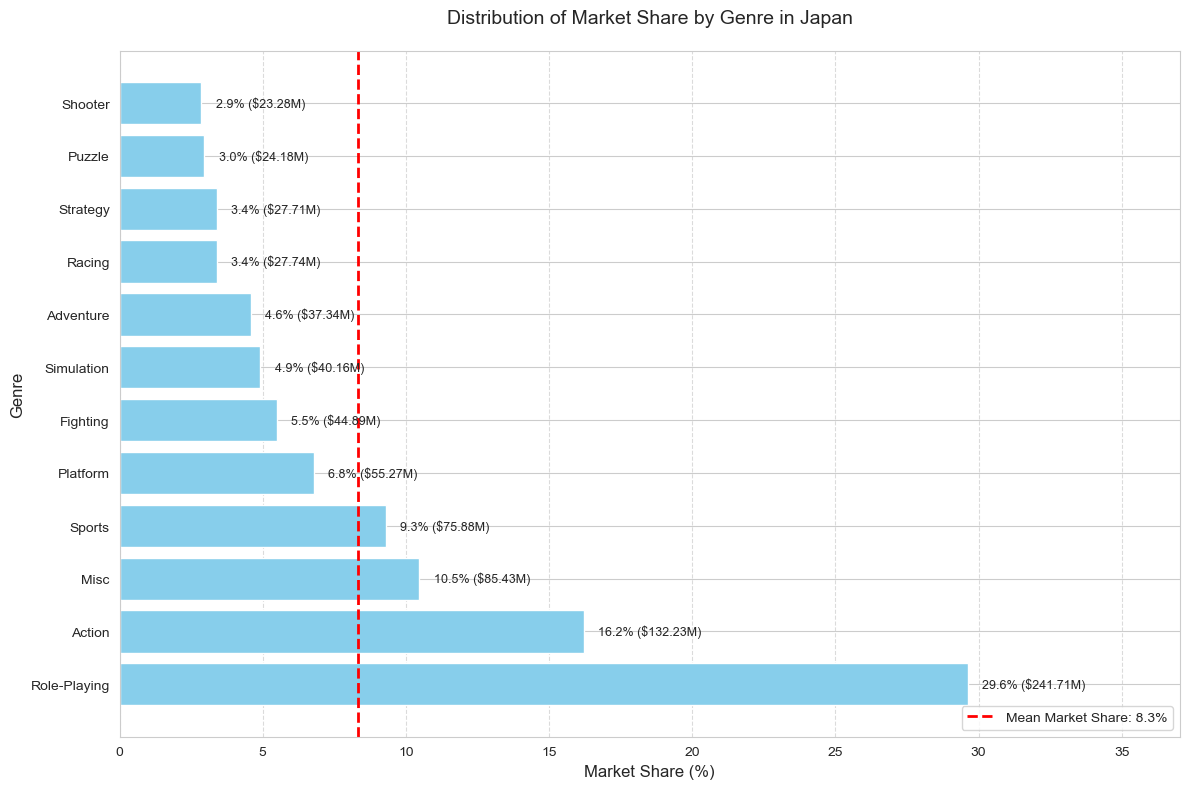

In [105]:
mean_share_jp = jp_sales_by_genre['market_share_region_top'].mean() * 100

plt.figure(figsize=(12, 8))
bars_jp = plt.barh(jp_sales_by_genre['genre'],
                   jp_sales_by_genre['market_share_region_top'] * 100,
                   color='skyblue')

plt.axvline(mean_share_jp, color='red', linestyle='--', linewidth=2, 
            label=f'Mean Market Share: {mean_share_jp:.1f}%')

for i, bar in enumerate(bars_jp):
    width = bar.get_width()
    sales_value = jp_sales_by_genre.iloc[i]['jp_sales']
    label_text = f'{width:.1f}% (${sales_value:.2f}M)'
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             label_text, va='center', fontsize=9)

plt.xlabel('Market Share (%)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Distribution of Market Share by Genre in Japan', fontsize=14, pad=20)
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, jp_sales_by_genre['market_share_region_top'].max() * 100 * 1.25)
plt.tight_layout()
plt.show()

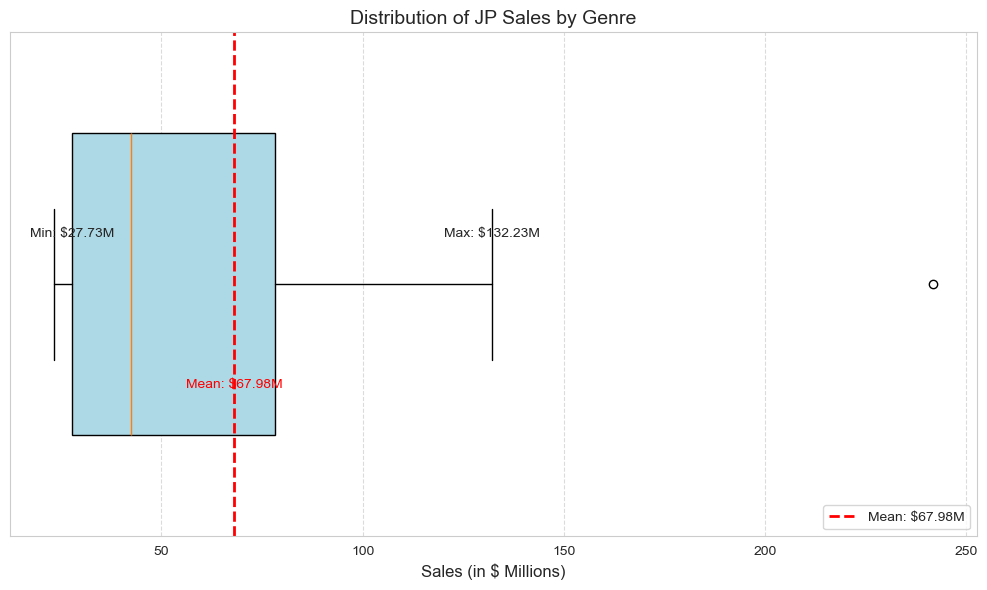

In [106]:
plt.figure(figsize=(10, 6))
box_jp = plt.boxplot(jp_sales_by_genre['jp_sales'], 
                     vert=False,
                     patch_artist=True,
                     widths=0.6)

for patch in box_jp['boxes']:
    patch.set_facecolor('lightblue')

mean_value_jp = np.mean(jp_sales_by_genre['jp_sales'])
plt.axvline(mean_value_jp, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${mean_value_jp:.2f}M')

plt.text(box_jp['whiskers'][0].get_xdata()[0], 1.1, 
         f"Min: ${box_jp['whiskers'][0].get_xdata()[0]:.2f}M", 
         ha='center', va='center')
plt.text(box_jp['whiskers'][1].get_xdata()[1], 1.1, 
         f"Max: ${box_jp['whiskers'][1].get_xdata()[1]:.2f}M", 
         ha='center', va='center')
plt.text(mean_value_jp, 0.8, 
         f"Mean: ${mean_value_jp:.2f}M", 
         ha='center', va='center', color='red')

plt.title('Distribution of JP Sales by Genre', fontsize=14)
plt.xlabel('Sales (in $ Millions)', fontsize=12)
plt.yticks([])
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [107]:
jp_sales_by_genre['sales_deviation'] = jp_sales_by_genre['jp_sales'] - jp_sales_by_genre['jp_sales'].mean()
jp_sales_std = jp_sales_by_genre['jp_sales'].std()
print(f"\nDesviación estándar de ventas por género en JP: {jp_sales_std:.2f}")
jp_sales_by_genre['z_score'] = (jp_sales_by_genre['jp_sales'] - jp_sales_by_genre['jp_sales'].mean()) / jp_sales_std
print("\nInformación de ventas por género en JP:")
print(jp_sales_by_genre[['genre', 'jp_sales', 'sales_deviation', 'z_score']])


Desviación estándar de ventas por género en JP: 63.42

Información de ventas por género en JP:
           genre  jp_sales  sales_deviation   z_score
0   Role-Playing    241.71          173.725  2.739311
1         Action    132.23           64.245  1.013021
2           Misc     85.43           17.445  0.275074
3         Sports     75.88            7.895  0.124489
4       Platform     55.27          -12.715 -0.200491
5       Fighting     44.89          -23.095 -0.364164
6     Simulation     40.16          -27.825 -0.438747
7      Adventure     37.34          -30.645 -0.483213
8         Racing     27.74          -40.245 -0.634587
9       Strategy     27.71          -40.275 -0.635060
10        Puzzle     24.18          -43.805 -0.690721
11       Shooter     23.28          -44.705 -0.704912


##### **JP** Conclusiones
Top Géneros: **Role-Playing, Action, Misc, Sports, Platform**

- Aqui encontramos 4 generos con desviaciones positivas. Un rendimiento similar a la region *NA*.
- La distribucion de ventas se encuentra sesgada hacia la derecha, con un promedio de ventas de **67.98 M de USD**, *226.15 M de USD* por debajo del promedio mas alto de las regiones (**NA**).
- Rango de **218.43**
- El género con mayores ventas es **Role-Playing**. Con un Standard Score de **2.73**, es decir con un mayor desempeño que el genero *Action* en *EU* y *NA*. Esto debido a la diferencia mas marcada entre promedio y mediana y el sesgo hacia la derecha de la distribucion de ventas.

**Conteo de Aparaciones en Top 5 por Region**

Top 5 generos por ventas globales:

    - Action: 3
    - Sports: 3
    - Shooter: 2
    - Role-Playing: 2
    - Misc: 3

* **Platform** no se encuentra en el top 5 ventas globales*


#### **Other** Análisis

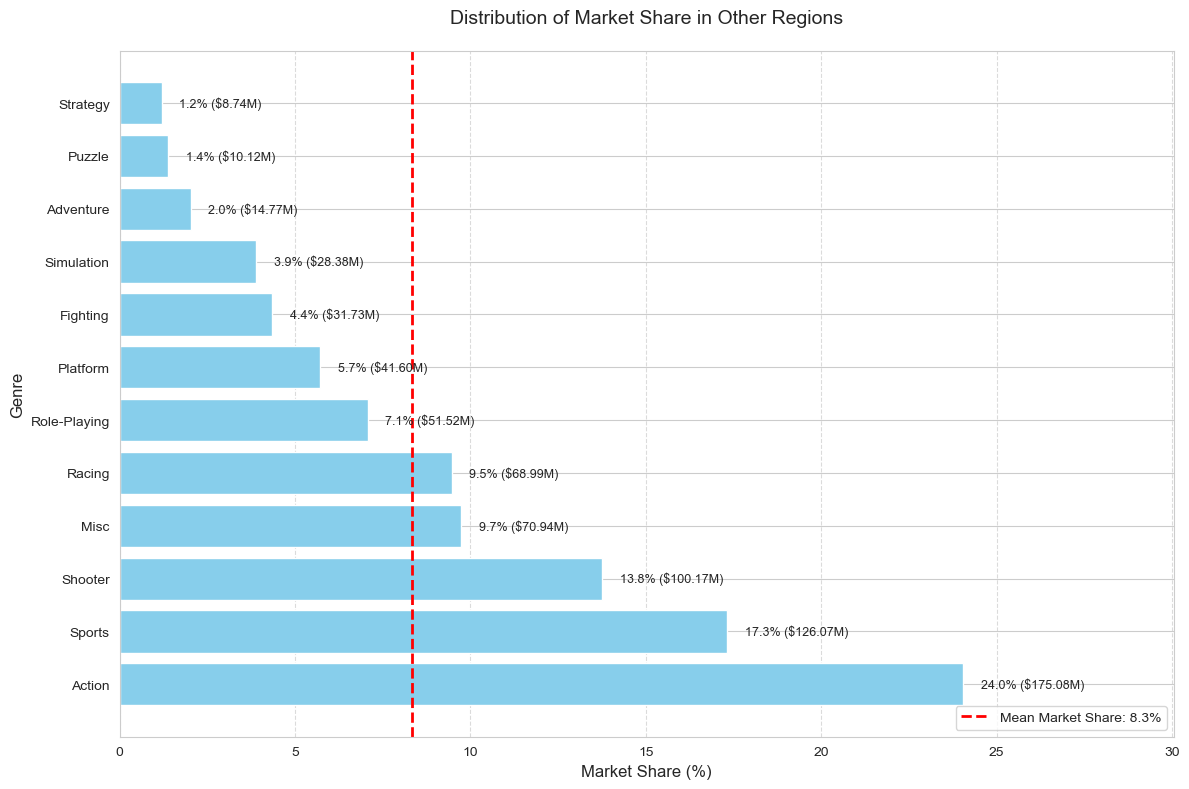

In [108]:
mean_share_other = other_sales_by_genre['market_share_region_top'].mean() * 100

plt.figure(figsize=(12, 8))
bars_other = plt.barh(other_sales_by_genre['genre'],
                      other_sales_by_genre['market_share_region_top'] * 100,
                      color='skyblue')

plt.axvline(mean_share_other, color='red', linestyle='--', linewidth=2, 
            label=f'Mean Market Share: {mean_share_other:.1f}%')

for i, bar in enumerate(bars_other):
    width = bar.get_width()
    sales_value = other_sales_by_genre.iloc[i]['other_sales']
    label_text = f'{width:.1f}% (${sales_value:.2f}M)'
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             label_text, va='center', fontsize=9)

plt.xlabel('Market Share (%)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Distribution of Market Share in Other Regions', fontsize=14, pad=20)
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, other_sales_by_genre['market_share_region_top'].max() * 100 * 1.25)
plt.tight_layout()
plt.show()



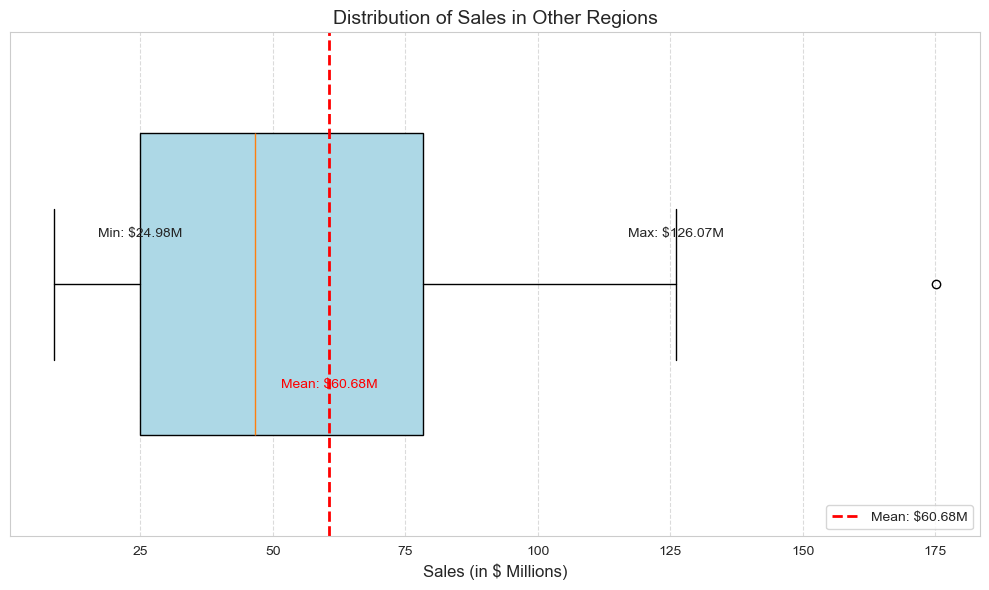

In [109]:
plt.figure(figsize=(10, 6))
box_other = plt.boxplot(other_sales_by_genre['other_sales'], 
                        vert=False,
                        patch_artist=True,
                        widths=0.6)

for patch in box_other['boxes']:
    patch.set_facecolor('lightblue')

mean_value_other = np.mean(other_sales_by_genre['other_sales'])
plt.axvline(mean_value_other, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${mean_value_other:.2f}M')

plt.text(box_other['whiskers'][0].get_xdata()[0], 1.1, 
         f"Min: ${box_other['whiskers'][0].get_xdata()[0]:.2f}M", 
         ha='center', va='center')
plt.text(box_other['whiskers'][1].get_xdata()[1], 1.1, 
         f"Max: ${box_other['whiskers'][1].get_xdata()[1]:.2f}M", 
         ha='center', va='center')
plt.text(mean_value_other, 0.8, 
         f"Mean: ${mean_value_other:.2f}M", 
         ha='center', va='center', color='red')

plt.title('Distribution of Sales in Other Regions', fontsize=14)
plt.xlabel('Sales (in $ Millions)', fontsize=12)
plt.yticks([])
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [110]:
other_sales_by_genre['sales_deviation'] = other_sales_by_genre['other_sales'] - other_sales_by_genre['other_sales'].mean()
other_sales_std = other_sales_by_genre['other_sales'].std()
print(f"\nDesviación estándar de ventas por género en Otras regiones: {other_sales_std:.2f}")
other_sales_by_genre['z_score'] = (other_sales_by_genre['other_sales'] - other_sales_by_genre['other_sales'].mean()) / other_sales_std
print("\nInformación de ventas por género en Otras regiones:")
print(other_sales_by_genre[['genre', 'other_sales', 'sales_deviation', 'z_score']])


Desviación estándar de ventas por género en Otras regiones: 51.16

Información de ventas por género en Otras regiones:
           genre  other_sales  sales_deviation   z_score
0         Action       175.08       114.404167  2.236307
1         Sports       126.07        65.394167  1.278287
2        Shooter       100.17        39.494167  0.772009
3           Misc        70.94        10.264167  0.200638
4         Racing        68.99         8.314167  0.162521
5   Role-Playing        51.52        -9.155833 -0.178973
6       Platform        41.60       -19.075833 -0.372883
7       Fighting        31.73       -28.945833 -0.565816
8     Simulation        28.38       -32.295833 -0.631300
9      Adventure        14.77       -45.905833 -0.897341
10        Puzzle        10.12       -50.555833 -0.988236
11      Strategy         8.74       -51.935833 -1.015212


##### **Other** Conclusiones
Top Géneros: **Action, Sports, Shooter, Misc, Racing**

- Aqui encontramos al top 5 con desviaciones positivas. Un rendimiento similar a la region *EU*.
- La distribucion de ventas se encuentra sesgada hacia la derecha, pero mas comprimida, con un promedio de ventas de **60.68 M de USD**, *233.45 M de USD* por debajo del promedio mas alto de las regiones (**NA**).
- Rango de **166.34**
- El género con mayores ventas es **Action**. Con un Standard Score de **2.23**. El mayor Standard Score para **Action** y el segundo mayor para los generos en los primeros lugares por region, por debajo de region *JP* con *2.73*.

**Conteo de Aparaciones en Top 5 por Region**

Top 5 generos por ventas globales:

    - Action: 4
    - Sports: 4
    - Shooter: 3
    - Role-Playing: 2
    - Misc: 4

* **Racing** no se encuentra en el top 5 ventas globales*


### Conclusiones generales:



In [111]:
# Calculate range to total sales ratio for each region 
na_range = na_sales_by_genre['na_sales'].max() - na_sales_by_genre['na_sales'].min()
eu_range = eu_sales_by_genre['eu_sales'].max() - eu_sales_by_genre['eu_sales'].min()
jp_range = jp_sales_by_genre['jp_sales'].max() - jp_sales_by_genre['jp_sales'].min()
other_range = other_sales_by_genre['other_sales'].max() - other_sales_by_genre['other_sales'].min()

na_total = na_sales_by_genre['na_sales'].sum()
eu_total = eu_sales_by_genre['eu_sales'].sum()
jp_total = jp_sales_by_genre['jp_sales'].sum()
other_total = other_sales_by_genre['other_sales'].sum()

na_range_ratio = na_range / na_total 
eu_range_ratio = eu_range / eu_total 
jp_range_ratio = jp_range / jp_total 
other_range_ratio = other_range / other_total 
print(f"\nRango de ventas en NA: {na_range:.2f} (Ratio Rango/Total: {na_range_ratio:.4f})")
print(f"Rango de ventas en EU: {eu_range:.2f} (Ratio Rango/Total: {eu_range_ratio:.4f})")
print(f"Rango de ventas en JP: {jp_range:.2f} (Ratio Rango/Total: {jp_range_ratio:.4f})")
print(f"Rango de ventas en Otras regiones: {other_range:.2f} (Ratio Rango/Total: {other_range_ratio:.4f})")


Rango de ventas en NA: 706.20 (Ratio Rango/Total: 0.2001)
Rango de ventas en EU: 434.03 (Ratio Rango/Total: 0.2081)
Rango de ventas en JP: 218.43 (Ratio Rango/Total: 0.2677)
Rango de ventas en Otras regiones: 166.34 (Ratio Rango/Total: 0.2285)


#### **Resultado de conteo de Aparaciones en Top 5 por Region**

Top 5 generos por ventas en regiones:

    - Action: 4
    - Sports: 4
    - Shooter: 3
    - Role-Playing: 2
    - Misc: 4

- Sabiendo que cada region tiene la misma cantidad de generos, y despues de calcular el radio de Rango vs Total de ventas de la region, podemos saber que el mercado con menor dispersion de ventas es **NA**. Lo cual podemos interpretar como un mercado **NO** especifico en cuanto generos que destacan, y aunque **Action** es el genero que mas destaca en esta region,  no es el que mejor se desempeña por region, pues su Standard Score es la tercera mas alta.
- El mercado con una distribucion mas amplia es **JP** el sesgo hacia la derecha nos muestra que los primero lugares son los que mandan las ventas en esta región, es decir es un mercado de nicho para géneros como **Role-Playing**.

### **c.** Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [112]:
# Create dataframe for each region with top 5 games by global sales, with ESRB classification 
na_top_games = (
    df_games[df_games['na_sales'] > 0 & (df_games['year_of_release'] >= 2000)]  # Filter games with NA sales	
    .nlargest(10, 'na_sales')  # Get top 10 by NA sales
    [['name', 'platform', 'na_sales', 'rating']]  # Select relevant columns
)
print("\nTop 5 juegos por ventas en NA:")
print(na_top_games.head(5))  # Show top 5
# Count how many games have each ESRB rating in NA
na_rating_counts = na_top_games['rating'].value_counts()
print("\nCantidad de juegos por clasificación ESRB en NA:")
print(na_rating_counts) 
print("#" * 30)
################################
eu_top_games = (
    df_games[df_games['eu_sales'] > 0 & (df_games['year_of_release'] >= 2000)]  # Filter games with EU sales
    .nlargest(10, 'eu_sales')  # Get top 10 by EU sales
    [['name', 'platform', 'eu_sales', 'rating']]  # Select relevant columns
)
print("\nTop 5 juegos por ventas en EU:")
print(eu_top_games.head(5))  # Show top 5
# Count how many games have each ESRB rating in EU
eu_rating_counts = na_top_games['rating'].value_counts()
print("\nCantidad de juegos por clasificación ESRB en EU:")
print(na_rating_counts) 
print("#" * 30)
################################
jp_top_games = (
    df_games[df_games['jp_sales'] > 0 & (df_games['year_of_release'] >= 2000)]  # Filter games with JP sales
    .nlargest(10, 'jp_sales')  # Get top 10 by JP sales
    [['name', 'platform', 'jp_sales', 'rating']]  # Select relevant columns
)
print("\nTop 5 juegos por ventas en JP:")
print(jp_top_games.head(5))  # Show top 5
# Count how many games have each ESRB rating in JP
jp_rating_counts = jp_top_games['rating'].value_counts()    
print("\nCantidad de juegos por clasificación ESRB en JP:")
print(jp_rating_counts)
print("#" * 30)
################################

other_top_games = (
    df_games[df_games['other_sales'] > 0 & (df_games['year_of_release'] >= 2000)]  # Filter games with Other sales
    .nlargest(10, 'other_sales')  # Get top 10 by Other sales
    [['name', 'platform', 'other_sales', 'rating']]  # Select relevant columns
)
print("\nTop 5 juegos por ventas en Otras regiones:")
print(other_top_games.head(5))  # Show top 5
print("\nCantidad de juegos por clasificación ESRB en Otras regiones:")
print(other_top_games['rating'].value_counts())  # Count how many games have each ESRB rating in Other regions
print("#" * 30)
###############################
# Show what ESRB ratings mean 
esrb_meanings = {
    'E': 'Everyone - Para todos - Apto para todas las edades',
    'E10+': 'Everyone 10 - Todos 10+ - Apto para mayores de 10 años',
    'T': 'Teen - Adolescentes - Apto para mayores de 13 años',  
    'M': 'Mature - Maduro - Apto para mayores de 17 años',
    'AO': 'Adults Only - Solo adultos - Apto solo para mayores de 18 años',
    'RP': 'Rating Pending - Clasificación pendiente'
}
print("\nSignificado de las clasificaciones ESRB:")
for rating, meaning in esrb_meanings.items():
    print(f"{rating}: {meaning}")


Top 5 juegos por ventas en NA:
                name platform  na_sales rating
0         Wii Sports      Wii     41.36      E
1  Super Mario Bros.      NES     29.08     RP
9          Duck Hunt      NES     26.93     RP
5             Tetris       GB     23.20     RP
2     Mario Kart Wii      Wii     15.68      E

Cantidad de juegos por clasificación ESRB en NA:
rating
E       6
RP      4
AO      0
E10+    0
EC      0
M       0
T       0
Name: count, dtype: int64
##############################

Top 5 juegos por ventas en EU:
                                            name platform  eu_sales rating
0                                     Wii Sports      Wii     28.96      E
2                                 Mario Kart Wii      Wii     12.76      E
10                                    Nintendogs       DS     10.95     RP
3                              Wii Sports Resort      Wii     10.93      E
19  Brain Age: Train Your Brain in Minutes a Day       DS      9.20      E

Cantidad de juegos 

In [113]:
# Calculate sales in each region for each rating
na_sales_by_rating = (
    df_games[df_games['na_sales'] > 0 & (df_games['year_of_release'] >= 2000)]  # Filter games with NA sales
    .groupby('rating', as_index=False)['na_sales']
    .sum()
    .sort_values('na_sales', ascending=False)
)
print("\nVentas en NA por clasificación ESRB:")
print(na_sales_by_rating)  # Show sales by rating in NA
###############
eu_sales_by_rating = (
    df_games[df_games['eu_sales'] > 0 & (df_games['year_of_release'] >= 2000)]  # Filter games with EU sales
    .groupby('rating', as_index=False)['eu_sales']
    .sum()
    .sort_values('eu_sales', ascending=False)
)
print("\nVentas en EU por clasificación ESRB:")
print(eu_sales_by_rating)  # Show sales by rating in EU
###############
jp_sales_by_rating = (
    df_games[df_games['jp_sales'] > 0 & (df_games['year_of_release'] >= 2000)]  # Filter games with JP sales
    .groupby('rating', as_index=False)['jp_sales']
    .sum()
    .sort_values('jp_sales', ascending=False)
)
print("\nVentas en JP por clasificación ESRB:")
print(jp_sales_by_rating)  # Show sales by rating in JP
###############
other_sales_by_rating = (
    df_games[df_games['other_sales'] > 0 & (df_games['year_of_release'] >= 2000)]  # Filter games with Other sales
    .groupby('rating', as_index=False)['other_sales']
    .sum()
    .sort_values('other_sales', ascending=False)
)
print("\nVentas en Otras regiones por clasificación ESRB:")
print(other_sales_by_rating)  # Show sales by rating in Other regions


Ventas en NA por clasificación ESRB:
  rating  na_sales
1      E   1276.80
5     RP   1227.62
6      T    747.60
4      M    742.89
2   E10+    345.50
3     EC      1.53
0     AO      1.26

Ventas en EU por clasificación ESRB:
  rating  eu_sales
1      E    704.14
5     RP    610.21
4      M    480.00
6      T    421.79
2   E10+    183.35
0     AO      0.61
3     EC      0.11

Ventas en JP por clasificación ESRB:
  rating  jp_sales
5     RP    836.74
1      E    199.42
6      T    150.70
4      M     63.58
2   E10+     40.20
0     AO      0.00
3     EC      0.00

Ventas en Otras regiones por clasificación ESRB:
  rating  other_sales
1      E       231.57
4      M       176.06
6      T       152.99
5     RP       149.96
2   E10+        71.93
3     EC         0.11
0     AO         0.09


C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\4224166632.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rating', as_index=False)['na_sales']
C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\4224166632.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rating', as_index=False)['eu_sales']
C:\Users\arq_c\AppData\Local\Temp\ipykernel_18632\4224166632.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

#### Conclusiones

**Del top 10 de juegos de cada region:**

Aparacion de clasificaciones ESRB:

* **NA**    
    **E:** 60%    
    **RP:** 40%

    Domina la clasificación *E*

* **EU**    
    **E:** 60%    
    **RP:** 40%

    Domina la clasificación *E*

* **JP**    
    **RP:** 70%    
    **E:** 30%

    Domina la clasificación *RP*

* **Other**    
    **E:** 70%    
    **M:** 20%
    **RP:** 10%

    Domina la clasificación *E*

- La clasificacion **RP** es bien adoptada en casi todas las regiones, excepto en la region **Other**.
- La clasificación **M** se encuentra en el top 10 de juegos de la region **Other**. 
- Se puede concluir que **si** hay una afectación a las ventas en relación con la clasificación asignada.

# Paso 5. Prueba las siguientes hipótesis:

## Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

**Hipótesis nula (H₀):** *Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.*

**Hipótesis alternativa (H₁):** *Hay una diferencia significativa entre las calificaciones promedio de Xbox One y PC, por lo tanto se rechaza H₀.*


In [114]:
# Calculate mean user score for XOne and for PC platforms in separated series after 2000
# Create XOne and PC user score series
xone_user_scores = pd.to_numeric(
    df_games[
        (df_games['platform'].isin(['XOne'])) & 
        (df_games['year_of_release'] >= 2000)
    ]['user_score_filled'],
    errors='coerce'
)
xone_user_scores = xone_user_scores.dropna()  # Drop NaN values
#print(xone_user_scores.info())  # Show XOne user scores info
#print(f"\nXOne User Scores (2000 and later):\n{xone_user_scores.describe()}")  # Show XOne user scores statistics

pc_user_scores = pd.to_numeric(
    df_games[
        (df_games['platform'].isin(['PC'])) & 
        (df_games['year_of_release'] >= 2000)
    ]['user_score_filled'],
    errors='coerce'
)
pc_user_scores = pc_user_scores.dropna()  # Drop NaN values
#print(pc_user_scores.info())  # Show PC user scores info
#print(f"\nPC User Scores (2000 and later):\n{pc_user_scores.describe()}")  # Show PC user scores statistics

In [115]:
results = st.ttest_ind(xone_user_scores, pc_user_scores)
alpha = 0.05  # Significance level

if results.pvalue < alpha:
    print(f"p-value: {results.pvalue}")
    print("Rechazamos H₀. Existe evidencia suficiente de que las calificaciones de Xbox One y PC son DIFERENTES.")
else:
    print(f"p-value: {results.pvalue.round(5)}")
    print("No rechazamos H₀. No existe evidencia suficiente para afirmar que las calificaciones son diferentes.")


p-value: 0.0003859429323650643
Rechazamos H₀. Existe evidencia suficiente de que las calificaciones de Xbox One y PC son DIFERENTES.


## Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

**Hipótesis nula (H₀):** *Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.*

**Hipótesis alternativa (H₁):** *Hay una diferencia significativa entre las calificaciones promedio de Xbox One y PC, por lo tanto se rechaza H₀.*

In [116]:
# Create two series with user scores for genres  Action and Sports
action_user_scores = pd.to_numeric(
    df_games[
        (df_games['genre'] == 'Action') & 
        (df_games['year_of_release'] >= 2000)
    ]['user_score_filled'],
    errors='coerce'
)
action_user_scores = action_user_scores.dropna()  # Drop NaN values
#print(action_user_scores.info())  # Show Action user scores info


sports_user_scores = pd.to_numeric(
    df_games[
        (df_games['genre'] == 'Sports') & 
        (df_games['year_of_release'] >= 2000)
    ]['user_score_filled'],
    errors='coerce'
)
sports_user_scores = sports_user_scores.dropna()  # Drop NaN values
#print(sports_user_scores.info())  # Show Sports user scores  info 

In [117]:
results = st.ttest_ind(action_user_scores, sports_user_scores)
alpha = 0.05  # Significance level

if results.pvalue < alpha:
    print(f"p-value: {results.pvalue}")
    print("Rechazamos H₀. Existe evidencia suficiente de que las calificaciones de Acción y Deportes son DIFERENTES.")
else:
    print(f"p-value: {results.pvalue.round(5)}")
    print("No rechazamos H₀. No existe evidencia suficiente para afirmar que las calificaciones son diferentes.")

p-value: 0.043221277966584586
Rechazamos H₀. Existe evidencia suficiente de que las calificaciones de Acción y Deportes son DIFERENTES.


## Conclusiones

- En el primer caso es sencillo articular las hipotesis, pues **H₀** representa un "no cambio" o igualdad. Y **H₁** buscará desacreditar **H₀**.
- En el segundo caso es algo distinto. La frase: *Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.* nos indica que la hipotesis quiere probar que la igualdad no existe, asi que asignamos **H₀** a la igualdad entre las calificaciones de los usuarios de los generos, y **H₁** para desacreditar la hipotesis nula. 

# Paso 6. Escribe una conclusión general

**Regiones y géneros**
- De las regiones dadas, es evidente que cada una ha adoptado géneros especificos y suele aceptar más ciertas clasificaciones. 
- Esto ayuda a saber por ejemplo: A que paises deberás dar soporte, en donde debes crear campañas de mercadotecnia y donde no, o hasta donde lanzar un titulo y donde no.

**Regiones, ventas y género**
- Aqui se puede teorizar sobre el capital disponible para hacer un juego. Si se espera una cantidad de ventas, podríamos asignar un presupuesto pequeño para una region con un desempeño alto de nuestro genero.
- Es evidente que un juego de rol (*Role-Playing*) a priori no tendrá un buen desempeño fuera de la región **JP**. 
- Si se intenta posicionar un juego para maximizar ventas en un sólo titulo, se sabe que deberá hacer un **Shooter** por el radio de titulos lanzados / ventas totales. 
- Si se intenta vender un juego en todas las regiones, **Action** es una buena opción. 

**Clasificaciones ESRB y ventas**
- Puesto que en algunas regiones se adoptan mas algunas clasificaciones que otras, se debería tomar en cuenta el tono del título para visualizar el alcance en las regiones.
- Siendo **RP** el mas común en todas las regiones.

**Criticas y ventas**
- Al crear campañas de mercadotecnia se debe influenciar la opinón de los críticos. Esto explicaría los lanzamientos cerrados previos a los lanzamientos públicos, para que las calificicaciones de criticos ayuden a comercializar un titulo. 

**Ciclo de vida de generaciones**
- Puesto que el tiempo promedio de aparición de nuevas plataformas es de 1.1 años, se debe asignar equipos que ayuden a portar los titulos a nuevas plataformas todos los años. Gasto que debera ser preeevisto en la planeación del juego. 

**Futuro**
- Al ver los géneros que dominan las ventas uno podría estipular una estratégia de lanzamientos para un género con nuevo titulos cada dados años.
- El tiempo de soporte de las plataformas si afecta las ventas. Entre más tiempo de vida se le de a una plataforma los titulos en ella venderán más.
